In [1]:
from __future__ import division
import numpy as np
import os, sys
import matplotlib
#matplotlib.use('Agg')
%matplotlib nbagg
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict


def getCDF(data):
    xdata = np.sort(data)
    ydata = [i/len(xdata) for i in range(len(xdata))]
    return xdata, ydata

## LOAD 1 HOUR/LATE NIGHT DATA
- 24 JAN 2017
- 2AM-3AM

In [2]:
df = pd.read_csv("../data/dns_data_cs/1hour-night/split_hour_00002_20170124015900.csv", sep="|", error_bad_lines=False,
                names=['time', 'srcip', 'dstip', 'dnsquery']).dropna()

df['time'] = pd.to_numeric(df['time'])

/usr/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

time         srcip     dstip                 dnsquery
0  0.004084   10.9.186.52  10.8.0.5          www.youtube.com
1  0.004886   10.9.186.52  10.8.0.6          www.youtube.com
2  0.007861  10.9.231.134  10.8.0.5            instagram.com
3  0.010363   10.9.186.52  10.8.0.5  youtube-ui.l.google.com
4  0.026029  10.9.185.235  10.8.0.5        guzzoni.apple.com

## STATS

In [4]:
print "Total time of dns record:", (df.iloc[-1]['time'] - df.iloc[0]['time']), "s"
print "Total number of queries: ", len(df)
print "Queries without source IP (are probably IPv6 so IP was not extracted): ", len(df[df['srcip']==''])

print "Unique source IPs (devices or homes):", len(df['srcip'].unique())
print "Unique destination IPs (DNS servers):", len(df['dstip'].unique())

print "Unique queries:", len(df['dnsquery'].unique())

Total time of dns record: 3599.988897 s
Total number of queries:  1099284
Queries without source IP (are probably IPv6 so IP was not extracted):  0
Unique source IPs (devices or homes): 8130
Unique destination IPs (DNS servers): 186
Unique queries: 67467


In [5]:
dns_server = df.groupby(['dstip'])['time'].count()
dns_server.sort(ascending=False)
dns_server

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting
  from ipykernel import kernelapp as app


dstip
10.8.0.5           672094
128.112.129.209    165375
128.112.129.7      139709
10.8.0.6            59598
128.112.128.1       16772
128.112.129.32      10348
128.112.133.220     10076
8.8.8.8              7355
192.168.1.1          5947
10.6.48.10           2689
10.6.48.144          1728
8.8.4.4              1572
128.112.129.111      1410
208.122.23.23         568
10.6.48.92            548
10.6.48.240           442
185.37.37.37          410
10.6.48.91            372
65.111.161.119        261
128.112.133.221       199
77.234.44.22          186
208.67.220.222        181
192.168.0.1           166
194.187.251.67        166
185.37.39.39          159
10.3.2.20             134
10.6.49.108           122
172.18.0.1            104
199.85.127.10          72
10.8.124.56            50
                    ...  
140.180.221.138         1
140.180.221.122         1
140.180.221.119         1
140.180.221.113         1
140.180.220.90          1
140.180.222.115         1
140.180.220.80          1
140.18

## NUMBER OF QUERIES PER SOURCE IP

In [6]:
tot_queries = df.groupby(['srcip'])['dnsquery'].count()
#tot_queries

<IPython.core.display.Javascript object>


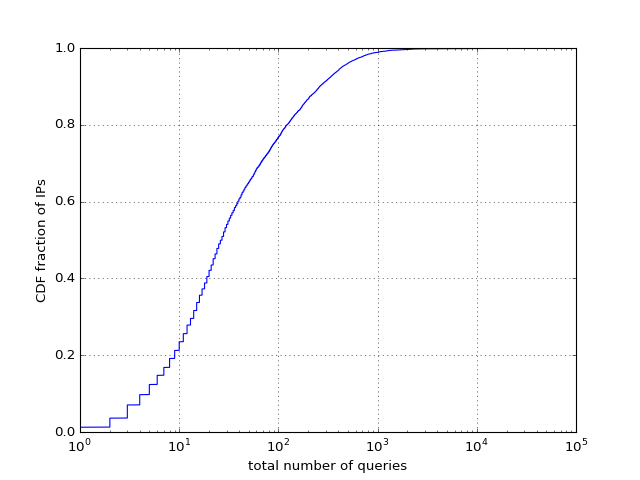

In [7]:
x,y = getCDF( tot_queries.values )

fig1, ax1 = plt.subplots()
ax1.plot(x,y)
ax1.set_xscale("log", nonposx='clip')
ax1.grid(1)
ax1.set_xlabel('total number of queries')
ax1.set_ylabel('CDF fraction of IPs')
fig1.show()

## NUMBER OF UNIQUE QUERIES PER SOURCE IP

In [8]:
gp1 = df.groupby(['srcip', 'dnsquery'])

In [9]:
df1 = gp1['time'].count().reset_index()

df1.head(20)

srcip                                           dnsquery  time
0   10.6.48.10                            CSGUM212W.princeton.edu     1
1   10.6.48.10                            CSGUM213W.princeton.edu     1
2   10.6.48.10                  _sipfederationtls._tcp.drexel.edu     3
3   10.6.48.10                              a1363.dscg.akamai.net     9
4   10.6.48.10                       api-dc8397fa.duosecurity.com    10
5   10.6.48.10                                    app.cronofy.com     2
6   10.6.48.10                          bogus-mname.princeton.edu     2
7   10.6.48.10                               crl.incommon-rsa.org     1
8   10.6.48.10                                  crl.microsoft.com     1
9   10.6.48.10                                  crl.usertrust.com     1
10  10.6.48.10                              crl.www.ms.akadns.net     7
11  10.6.48.10                            ctldl.windowsupdate.com     1
12  10.6.48.10                          e1863.dspb.akamaiedge.net    10
13  10.6.48.10                                 ocsp.usertrust.com     1
14  10.6.48.10  princetonu-mail-onmicrosoft-com.mail.eo.outloo...    34
15  10.6.48.10                    princetonu.mail.onmicrosoft.com     1
16  10.6.48.10                                 smtp.princeton.edu     9
17  10.6.48.10                           uc-cuc-p01.princeton.edu     2
18  10.6.48.10                           uc-cuc-s01.princeton.edu     1
19  10.6.48.10                                 wpad.princeton.edu     2

In [10]:
len(df1)

364635

In [11]:
df_bad_q = df1[ (~df1['dnsquery'].str.contains(".")) | (df1['dnsquery'].str.contains("<"))]

In [12]:
len(df_bad_q)

32

In [13]:
df_bad_q

srcip                                           dnsquery  \
30419       10.8.124.56                           <Unknown extended label>   
30420       10.8.124.56  <Unknown extended label>,<Unknown extended label>   
30421       10.8.124.56  <Unknown extended label>,<Unknown extended lab...   
30422       10.8.124.56  <Unknown extended label>,<Unknown extended lab...   
30423       10.8.124.56  <Unknown extended label>,<Unknown extended lab...   
30424       10.8.124.56  <Unknown extended label>,<Unknown extended lab...   
30425       10.8.124.56  <Unknown extended label>,<Unknown extended lab...   
50869       10.8.152.67                                             <Root>   
129072        10.8.3.83                           <Unknown extended label>   
129073        10.8.3.83  <Unknown extended label>,<Unknown extended label>   
201468      10.9.128.50                                             <Root>   
207487      10.9.134.35                                             <Root>   
217088      10.9.15.236                           <Unknown extended label>   
229733      10.9.165.87                           <Unknown extended label>   
229734      10.9.165.87  <Unknown extended label>,<Unknown extended label>   
230014     10.9.166.179                                             <Root>   
238901     10.9.179.184                           <Unknown extended label>   
268121      10.9.22.225                                             <Root>   
300307       10.9.41.24                           <Unknown extended label>   
318747      10.9.63.250                                             <Root>   
330422       10.9.78.74  <Unknown extended label>,<Unknown extended label>   
361248  140.180.223.155                                             <Root>   
364623     77.234.44.22                                             <Root>   
364624     77.234.44.22                           <Unknown extended label>   
364625     77.234.44.22                    <Unknown extended label>,<Root>   
364626     77.234.44.22  <Unknown extended label>,<Unknown extended label>   
364627     77.234.44.22  <Unknown extended label>,<Unknown extended lab...   
364628     77.234.44.22  <Unknown extended label>,<Unknown extended lab...   
364631     77.234.44.22  C*���I���]ؙ�.�4�̏�,<Unknown extended la...   
364632     77.234.44.22  CB��I�����Ǯ�����P���y,<Unknown extended l...   
364633     77.234.44.22      Cf�f&Iͼ�Oٕ`5�))`,<Unknown extended label>   
364634     77.234.44.45                           <Unknown extended label>   

        time  
30419    122  
30420     38  
30421      1  
30422     14  
30423      3  
30424      1  
30425      1  
50869      1  
129072     1  
129073     1  
201468     1  
207487     1  
217088     1  
229733     4  
229734     1  
230014     1  
238901     2  
268121     1  
300307     1  
318747     1  
330422     3  
361248     2  
364623     1  
364624    26  
364625     1  
364626     5  
364627    10  
364628     2  
364631     1  
364632     1  
364633     1  
364634     1

In [14]:
# filter
df2 = df1[ (df1['dnsquery'].str.contains(".")) & (~df1['dnsquery'].str.contains("<"))]
len(df2)

364603

In [15]:
gp2 = df2.groupby('srcip')
df3 = gp2['dnsquery'].count()

In [16]:
print "Number of source IPs =", len(df3)
print "Number of unique queries =", sum(df3)

Number of source IPs = 8129
Number of unique queries = 364603


<IPython.core.display.Javascript object>


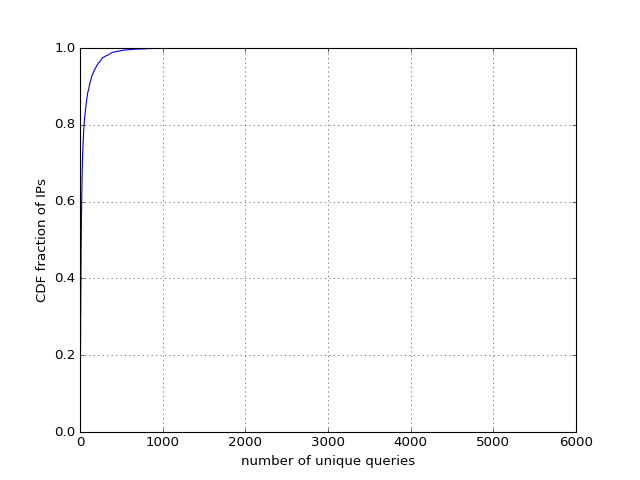

In [17]:
x,y = getCDF(df3.values)

fig1, ax1 = plt.subplots()
ax1.plot(x,y)
#ax1.set_xscale("log", nonposx='clip')
ax1.grid(1)
ax1.set_xlabel('number of unique queries')
ax1.set_ylabel('CDF fraction of IPs')
fig1.show()

<IPython.core.display.Javascript object>


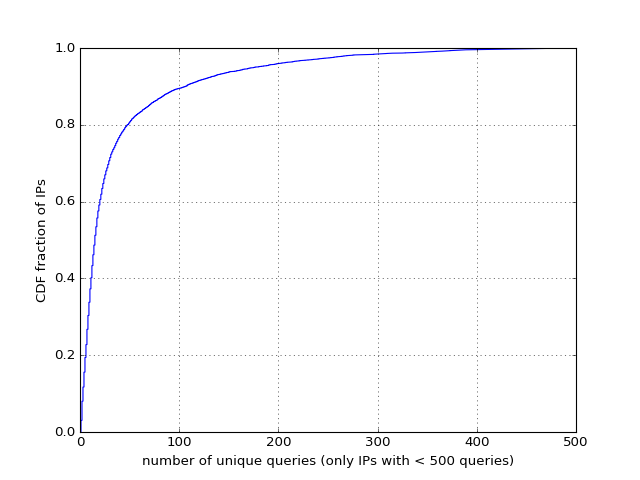

In [18]:
df4 = df3[ df3<500 ]

x,y = getCDF(df4.values)

fig1, ax1 = plt.subplots()
ax1.plot(x,y)
#ax1.set_xscale("log", nonposx='clip')
ax1.grid(1)
ax1.set_xlabel('number of unique queries (only IPs with < 500 queries)')
ax1.set_ylabel('CDF fraction of IPs')
fig1.show()

In [20]:
print len(df4), len(df3)

8074 8129


In [21]:
df5 = df3[df3<50]
len(df5)

6495

In [22]:
df5.head()

srcip
10.6.48.10     23
10.6.48.100    13
10.6.48.103    11
10.6.48.104     8
10.6.48.105    11
Name: dnsquery, dtype: int64

## 1. FILTER IP/DNS to only those with less than 500 queries in 1 hour

In [23]:
df_query_count = df2 [ df2['srcip'].isin(df5.index) ]
print len(df_query_count)
df_query_count.head()

94119


srcip                           dnsquery  time
0  10.6.48.10            CSGUM212W.princeton.edu     1
1  10.6.48.10            CSGUM213W.princeton.edu     1
2  10.6.48.10  _sipfederationtls._tcp.drexel.edu     3
3  10.6.48.10              a1363.dscg.akamai.net     9
4  10.6.48.10       api-dc8397fa.duosecurity.com    10

## 2. FILTER BY NUMBER OF QUERIES TO ANY UNIQUE DOMAIN <= 60 IN 1 HOUR
- Confirm this magic number in meeting
- Can also go for total number of queries instead of number of queries to unique domain per hour
- Need to confirm characteristics of bg traffic
- example: nest thermostat one query per 10 mins
- how to separate bg of computers/mobiles and bg of iots using this?

In [24]:
df_query_count2 = df_query_count[df_query_count['time']<=60]
print len(df_query_count2)
df_query_count2

93874


srcip                                           dnsquery  \
0            10.6.48.10                            CSGUM212W.princeton.edu   
1            10.6.48.10                            CSGUM213W.princeton.edu   
2            10.6.48.10                  _sipfederationtls._tcp.drexel.edu   
3            10.6.48.10                              a1363.dscg.akamai.net   
4            10.6.48.10                       api-dc8397fa.duosecurity.com   
5            10.6.48.10                                    app.cronofy.com   
6            10.6.48.10                          bogus-mname.princeton.edu   
7            10.6.48.10                               crl.incommon-rsa.org   
8            10.6.48.10                                  crl.microsoft.com   
9            10.6.48.10                                  crl.usertrust.com   
10           10.6.48.10                              crl.www.ms.akadns.net   
11           10.6.48.10                            ctldl.windowsupdate.com   
12           10.6.48.10                          e1863.dspb.akamaiedge.net   
13           10.6.48.10                                 ocsp.usertrust.com   
14           10.6.48.10  princetonu-mail-onmicrosoft-com.mail.eo.outloo...   
15           10.6.48.10                    princetonu.mail.onmicrosoft.com   
16           10.6.48.10                                 smtp.princeton.edu   
17           10.6.48.10                           uc-cuc-p01.princeton.edu   
18           10.6.48.10                           uc-cuc-s01.princeton.edu   
19           10.6.48.10                                 wpad.princeton.edu   
20           10.6.48.10                          wpad.pu.win.prinecton.edu   
21           10.6.48.10                                  www.microsoft.com   
22           10.6.48.10  www.microsoft.com-c-2.edgekey.net.globalredir....   
23          10.6.48.100                        PDOM05.pu.win.princeton.edu   
24          10.6.48.100                        PDOM08.pu.win.princeton.edu   
25          10.6.48.100                              SDP202W.princeton.edu   
26          10.6.48.100  _kerberos._tcp.Default-First-Site-Name._sites....   
27          10.6.48.100  _ldap._tcp.Default-First-Site-Name._sites.dc._...   
28          10.6.48.100                          bogus-mname.Princeton.EDU   
29          10.6.48.100                            ctldl.windowsupdate.com   
...                 ...                                                ...   
364592    172.20.50.102                3.debian.pool.ntp.org.princeton.edu   
364595      192.168.4.5                  _sipfederationtls._tcp.drexel.edu   
364597   205.172.167.14                               pu.win.princeton.edu   
364598   205.172.167.21  1436-ms-7.18-3311496a.7698995c-da52-11e6-5d86-...   
364599   205.172.167.21                               pu.win.princeton.edu   
364600  205.172.167.228  1400-ms-7.1-294d97a.9d0bca27-e208-11e6-44af-00...   
364601  205.172.167.228                               pu.win.princeton.edu   
364602  205.172.167.253                               pu.win.princeton.edu   
364603   205.172.167.92  1156-ms-7.2-3dd2407.80530aaf-e16c-11e6-a59d-d8...   
364604   205.172.167.92                               pu.win.princeton.edu   
364605   205.172.167.95                               pu.win.princeton.edu   
364606   205.172.167.97                               pu.win.princeton.edu   
364607   66.180.180.237                               pu.win.princeton.edu   
364608   66.180.180.239                               pu.win.princeton.edu   
364609   66.180.180.242                               pu.win.princeton.edu   
364610   66.180.181.216                               pu.win.princeton.edu   
364611   66.180.181.253                               pu.win.princeton.edu   
364612    66.180.181.52                               pu.win.princeton.edu   
364613    66.180.182.13                               pu.win.princeton.edu   
364614   66.180.182.240                 

In [25]:
dns_popular = df_query_count2.groupby('dnsquery')['srcip'].count()
dns_popular.sort()
dns_popular

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting
  from ipykernel import kernelapp as app


dnsquery
â.princeton.edu                                        1
gso100w.princeton.edu                                   1
gsdpxbbysyxe.princeton.edu                              1
s.pinimg.com                                            1
s.pmddby.com                                            1
s.skimresources.com                                     1
gs2-sec.ww.prod.dl.playstation.net                      1
s.tpctrust.com                                          1
s.update.openx.com                                      1
s.update.rubiconproject.com                             1
s.w.org                                                 1
groups.google.com                                       1
groupme.com                                             1
grokio.blob.core.windows.net                            1
grits.enthought.com                                     1
s.zkcdn.net                                             1
greygoose.princeton.edu                                 1
grego

### EXAMPLE FOR BG QUERIES TO *.XBOXLIVE.COM

In [26]:
xbox_q = df_query_count2 [ df_query_count2['dnsquery'].str.contains('xboxlive.com') ]

xbox_q_count = xbox_q.groupby('srcip')['time'].sum()

In [27]:
xbox_q.groupby('dnsquery')['srcip'].count()

dnsquery
accounts.xboxlive.com                                1
appchannels-connect.xboxlive.com                     1
assets1.xboxlive.com                                 2
attestation.xboxlive.com                             8
cloudcollection-ssl.xboxlive.com                     6
data-vef.xboxlive.com                                1
eplists.xboxlive.com                                 2
images-eds.xboxlive.com                              1
instance.mgt.xboxlive.com                            2
musicdelivery-ssl.xboxlive.com                       6
notify.xboxlive.com                                  2
peoplehub.xboxlive.com                               1
profile.xboxlive.com                                 1
settings-ssl.xboxlive.com                           15
settings.xboxlive.com                                6
social.xboxlive.com                                  1
title.auth.xboxlive.com                              1
title.mgt.xboxlive.com                               3
t

<IPython.core.display.Javascript object>


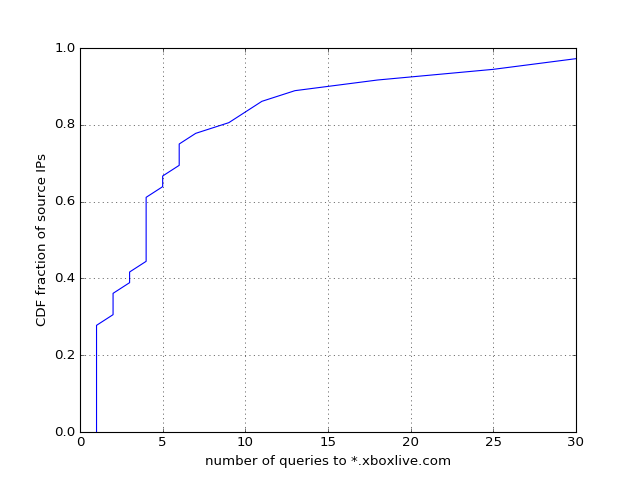

In [28]:
# CDF of number of queries to xboxlive.com related domains

x,y = getCDF(xbox_q_count.values)

fig1, ax1 = plt.subplots()
ax1.plot(x,y)
#ax1.set_xscale("log", nonposx='clip')
ax1.grid(1)
ax1.set_xlabel('number of queries to *.xboxlive.com')
ax1.set_ylabel('CDF fraction of source IPs')
fig1.show()

### EXAMPLE FOR BG QUERIES TO *.FITBIT.COM
- mostly queries from fitbit app to a server
- these IPs are most probably phones

In [29]:
fitbit_q = df_query_count2 [ df_query_count2['dnsquery'].str.contains('fitbit.com') ]
fitbit_q

srcip                       dnsquery  time
14865   10.8.105.206                 fsc.fitbit.com     1
14871   10.8.105.206      iphone-cdn-api.fitbit.com     2
14872   10.8.105.206   iphone-cdn-client.fitbit.com     4
20102    10.8.111.63      desktop-client.fitbit.com     1
20103    10.8.111.63      desktop-static.fitbit.com     1
23844   10.8.116.133      iphone-cdn-api.fitbit.com    12
23845   10.8.116.133   iphone-cdn-client.fitbit.com     4
41305   10.8.139.152      iphone-cdn-api.fitbit.com     4
41306   10.8.139.152   iphone-cdn-client.fitbit.com     4
47762   10.8.147.158      desktop-client.fitbit.com     1
47763   10.8.147.158      desktop-static.fitbit.com     1
67616   10.8.172.204     android-cdn-api.fitbit.com     3
67617   10.8.172.204  android-cdn-client.fitbit.com     3
78978   10.8.186.253     android-cdn-api.fitbit.com     2
78979   10.8.186.253  android-cdn-client.fitbit.com     2
83416   10.8.190.222                 fsc.fitbit.com     2
83423   10.8.190.222      iphone-cdn-api.fitbit.com     4
83424   10.8.190.222   iphone-cdn-client.fitbit.com     6
94474   10.8.203.217      desktop-client.fitbit.com     1
94475   10.8.203.217      desktop-static.fitbit.com     1
95838   10.8.206.113   iphone-cdn-client.fitbit.com     3
97932    10.8.21.156      iphone-cdn-api.fitbit.com     6
97933    10.8.21.156   iphone-cdn-client.fitbit.com     4
99873   10.8.212.117      iphone-cdn-api.fitbit.com     4
99874   10.8.212.117   iphone-cdn-client.fitbit.com     4
109596  10.8.229.201   iphone-cdn-client.fitbit.com     4
119946  10.8.245.204     android-cdn-api.fitbit.com     2
119947  10.8.245.204  android-cdn-client.fitbit.com     2
120733   10.8.246.40     android-cdn-api.fitbit.com     2
120734   10.8.246.40  android-cdn-client.fitbit.com     2
...              ...                            ...   ...
271163  10.9.225.184      windows-client.fitbit.com     2
280661    10.9.24.82     android-cdn-api.fitbit.com     2
280662    10.9.24.82  android-cdn-client.fitbit.com     2
280681    10.9.24.82             static0.fitbit.com     2
282267  10.9.244.154         windows-api.fitbit.com     1
285572  10.9.250.199                 fsc.fitbit.com     2
285578  10.9.250.199      iphone-cdn-api.fitbit.com     2
285579  10.9.250.199   iphone-cdn-client.fitbit.com     4
289807   10.9.255.43      iphone-cdn-api.fitbit.com     1
291979   10.9.27.214                 fsc.fitbit.com     2
291990   10.9.27.214      iphone-cdn-api.fitbit.com     2
291991   10.9.27.214   iphone-cdn-client.fitbit.com     4
298788    10.9.4.126      iphone-cdn-api.fitbit.com     3
298789    10.9.4.126   iphone-cdn-client.fitbit.com     4
313340   10.9.57.247      desktop-client.fitbit.com     1
313341   10.9.57.247      desktop-static.fitbit.com     1
317434   10.9.61.191      iphone-cdn-api.fitbit.com     2
317435   10.9.61.191   iphone-cdn-client.fitbit.com     4
317475   10.9.61.203                 fsc.fitbit.com     1
317485   10.9.61.203      iphone-cdn-api.fitbit.com     2
317486   10.9.61.203   iphone-cdn-client.fitbit.com     4
330528   10.9.79.166                 fsc.fitbit.com     2
330535   10.9.79.166                iedc.fitbit.com     1
330539   10.9.79.166      iphone-cdn-api.fitbit.com     3
330540   10.9.79.166   iphone-cdn-client.fitbit.com     3
330548   10.9.79.166             static0.fitbit.com     1
336468   10.9.86.154     android-cdn-api.fitbit.com     1
336469   10.9.86.154  android-cdn-client.fitbit.com     1
343625   10.9.96.176     android-cdn-api.fitbit.com     2
343626   10.9.96.176  android-cdn-client.fitbit.com     2

[104 rows x 3 columns]

In [30]:
fitbit_q_count = fitbit_q.groupby('srcip')['time'].sum()
fitbit_q_count.head()

srcip
10.8.105.206     7
10.8.111.63      2
10.8.116.133    16
10.8.139.152     8
10.8.147.158     2
Name: time, dtype: int64

<IPython.core.display.Javascript object>


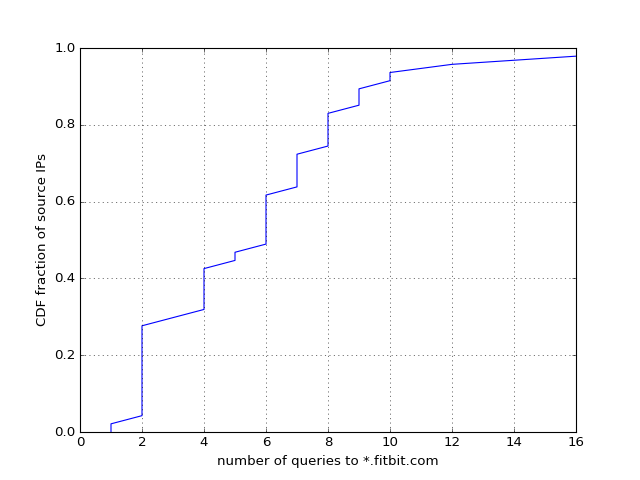

In [31]:
# CDF of number of queries to fitbit.com related domains

x,y = getCDF(fitbit_q_count.values)

fig1, ax1 = plt.subplots()
ax1.plot(x,y)
#ax1.set_xscale("log", nonposx='clip')
ax1.grid(1)
ax1.set_xlabel('number of queries to *.fitbit.com')
ax1.set_ylabel('CDF fraction of source IPs')
fig1.show()

# STUDYING TIME PATTERN OF BG QUERIES
- Example iphone fitbit client queries
- shows 900 second pattern (3-4 queries per hour)

In [32]:
all_fitbit_client_q = df[ df['dnsquery']=='iphone-cdn-client.fitbit.com' ]

print len(all_fitbit_client_q), len(all_fitbit_client_q['srcip'].unique())

all_fitbit_client_q

112 29


time         srcip     dstip                      dnsquery
10667      31.775905   10.8.21.156  10.8.0.5  iphone-cdn-client.fitbit.com
33778      94.711757  10.8.116.133  10.8.0.5  iphone-cdn-client.fitbit.com
55441     151.995178  10.9.121.232  10.8.0.5  iphone-cdn-client.fitbit.com
71222     195.423877   10.9.160.46  10.8.0.5  iphone-cdn-client.fitbit.com
80834     222.442488  10.8.168.166  10.8.0.5  iphone-cdn-client.fitbit.com
83372     231.302850   10.9.61.203  10.8.0.5  iphone-cdn-client.fitbit.com
86876     241.107014  10.9.200.223  10.8.0.5  iphone-cdn-client.fitbit.com
104972    286.087824   10.8.247.34  10.8.0.5  iphone-cdn-client.fitbit.com
113439    309.623059   10.9.61.191  10.8.0.5  iphone-cdn-client.fitbit.com
120265    330.083071   10.8.222.53  10.8.0.5  iphone-cdn-client.fitbit.com
120951    332.377826  10.9.110.115  10.8.0.5  iphone-cdn-client.fitbit.com
123831    341.303760    10.9.19.24  10.8.0.5  iphone-cdn-client.fitbit.com
137276    376.142206  10.9.102.149  10.8.0.6  iphone-cdn-client.fitbit.com
145295    399.354694  10.8.212.117  10.8.0.5  iphone-cdn-client.fitbit.com
173424    485.869118  10.8.139.152  10.8.0.5  iphone-cdn-client.fitbit.com
180160    504.650541  10.9.250.199  10.8.0.5  iphone-cdn-client.fitbit.com
185589    522.661422   10.9.27.214  10.8.0.5  iphone-cdn-client.fitbit.com
199899    558.756345  10.8.105.206  10.8.0.5  iphone-cdn-client.fitbit.com
222832    615.408799  10.8.229.201  10.8.0.5  iphone-cdn-client.fitbit.com
223536    617.636302  10.8.134.149  10.8.0.5  iphone-cdn-client.fitbit.com
247968    686.286316    10.9.80.67  10.8.0.5  iphone-cdn-client.fitbit.com
252354    700.436886   10.8.161.95  10.8.0.5  iphone-cdn-client.fitbit.com
259259    722.407675  10.9.136.193  10.8.0.5  iphone-cdn-client.fitbit.com
259260    722.407686  10.9.136.193  10.8.0.5  iphone-cdn-client.fitbit.com
272275    761.826765  10.8.190.222  10.8.0.5  iphone-cdn-client.fitbit.com
298012    842.506517    10.9.4.126  10.8.0.5  iphone-cdn-client.fitbit.com
317619    904.589855  10.8.206.113  10.8.0.5  iphone-cdn-client.fitbit.com
332589    950.169391   10.8.21.156  10.8.0.5  iphone-cdn-client.fitbit.com
350507   1007.774614  10.8.116.133  10.8.0.5  iphone-cdn-client.fitbit.com
368818   1070.962856  10.9.121.232  10.8.0.5  iphone-cdn-client.fitbit.com
...              ...           ...       ...                           ...
834358   2600.329908  10.8.190.222  10.8.0.6  iphone-cdn-client.fitbit.com
851595   2670.663096    10.9.4.126  10.8.0.5  iphone-cdn-client.fitbit.com
884905   2791.790694   10.8.222.53  10.8.0.5  iphone-cdn-client.fitbit.com
885184   2792.914485   10.8.21.156  10.8.0.5  iphone-cdn-client.fitbit.com
893209   2825.628195  10.8.206.113  10.8.0.5  iphone-cdn-client.fitbit.com
895471   2832.795278  10.8.116.133  10.8.0.5  iphone-cdn-client.fitbit.com
909283   2887.070741   10.9.80.117  10.8.0.5  iphone-cdn-client.fitbit.com
909284   2887.070968   10.9.80.117  10.8.0.5  iphone-cdn-client.fitbit.com
914835   2907.804305  10.9.121.232  10.8.0.5  iphone-cdn-client.fitbit.com
925088   2946.845778   10.9.160.46  10.8.0.5  iphone-cdn-client.fitbit.com
928404   2958.566271  10.9.136.193  10.8.0.5  iphone-cdn-client.fitbit.com
928405   2958.566281  10.9.136.193  10.8.0.5  iphone-cdn-client.fitbit.com
931989   2972.462154  10.9.200.223  10.8.0.5  iphone-cdn-client.fitbit.com
932516   2974.738787   10.9.61.203  10.8.0.5  iphone-cdn-client.fitbit.com
952467   3051.391735   10.8.247.34  10.8.0.5  iphone-cdn-client.fitbit.com
955878   3064.398052   10.9.61.191  10.8.0.5  iphone-cdn-client.fitbit.com
957153   3069.489118  10.9.110.115  10.8.0.5  iphone-cdn-client.fitbit.com
962782   3086.900369    10.9.19.24  10.8.0.5  iphone-cdn-client.fitbit.com
979659   3152.352504  10.8.212.117  10.8.0.5  iphone-cdn-client.fitbit.com
1000045  3233.710888  10.8.139.152  10.8.0.5  iphone-cdn-client.fitbit.com
1003126  3243.728635  10.9.250.199  10.8.0.5  iphone-cdn-client.fitbit.com
1011155  3273.459367   10.9.27.214  10.8.

In [33]:
all_fitbit_client_q[ all_fitbit_client_q['srcip']=='10.8.21.156' ]

time        srcip     dstip                      dnsquery
10667     31.775905  10.8.21.156  10.8.0.5  iphone-cdn-client.fitbit.com
332589   950.169391  10.8.21.156  10.8.0.5  iphone-cdn-client.fitbit.com
618687  1871.280133  10.8.21.156  10.8.0.5  iphone-cdn-client.fitbit.com
885184  2792.914485  10.8.21.156  10.8.0.5  iphone-cdn-client.fitbit.com

In [34]:
all_fitbit_client_q[ all_fitbit_client_q['srcip']=='10.8.116.133' ]

time         srcip     dstip                      dnsquery
33778     94.711757  10.8.116.133  10.8.0.5  iphone-cdn-client.fitbit.com
350507  1007.774614  10.8.116.133  10.8.0.5  iphone-cdn-client.fitbit.com
633112  1920.279791  10.8.116.133  10.8.0.6  iphone-cdn-client.fitbit.com
895471  2832.795278  10.8.116.133  10.8.0.5  iphone-cdn-client.fitbit.com

In [35]:
all_fitbit_client_q[ all_fitbit_client_q['srcip']=='10.9.4.126' ]  

time       srcip     dstip                      dnsquery
298012    842.506517  10.9.4.126  10.8.0.5  iphone-cdn-client.fitbit.com
584116   1755.220422  10.9.4.126  10.8.0.5  iphone-cdn-client.fitbit.com
851595   2670.663096  10.9.4.126  10.8.0.5  iphone-cdn-client.fitbit.com
1095557  3587.300325  10.9.4.126  10.8.0.5  iphone-cdn-client.fitbit.com

### time pattern difference mean and std 

In [36]:
gp_fitbit = all_fitbit_client_q.groupby('srcip')['time']

In [37]:
def get_time_diff(a):
    return [t - s for s, t in zip(a, a[1:])]

In [38]:
time_diff_fitbit = gp_fitbit.apply(lambda x: get_time_diff( tuple(x) ))
print len(time_diff_fitbit)
time_diff_fitbit

29


srcip
10.8.105.206                 [916.270245, 915.563813, 917.130909]
10.8.116.133                 [913.062857, 912.505177, 912.515487]
10.8.134.149                 [959.814482, 959.859444, 960.338687]
10.8.139.152                 [916.741701, 915.815647, 915.284422]
10.8.161.95                   [918.93382, 916.702536, 919.880416]
10.8.168.166                                                   []
10.8.190.222    [917.014177, 1.09999998585e-05, 917.782895, 0....
10.8.206.113                             [962.273541, 958.764799]
10.8.21.156                  [918.393486, 921.110742, 921.634352]
10.8.212.117                 [917.621996, 917.565851, 917.809963]
10.8.222.53                  [908.780306, 642.774004, 910.153313]
10.8.229.201                 [924.283843, 916.103112, 915.580597]
10.8.247.34                  [922.497237, 921.518021, 921.288653]
10.9.102.149                                         [915.553466]
10.9.110.115                   [912.55575, 912.28529, 912.270252]
10.9

In [39]:
describe_dict = defaultdict(list)

for ix, row in time_diff_fitbit.iteritems():
    describe_dict['srcip'].append(ix)
    describe_dict['count'].append( len(row) )
    describe_dict['mean'].append( np.mean(row) )
    describe_dict['std'].append( np.std(row) )
    #describe_dict['median'].append( np.median(row) )
    
fitbit_client_time_stats = pd.DataFrame(describe_dict).set_index('srcip')

/usr/local/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/usr/local/lib/python2.7/site-packages/numpy/core/_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)


In [40]:
fitbit_client_time_stats

count        mean         std
srcip                                      
10.8.105.206      3  916.321656    0.640796
10.8.116.133      3  912.694507    0.260497
10.8.134.149      3  960.004204    0.237226
10.8.139.152      3  915.947257    0.602166
10.8.161.95       3  918.505591    1.332233
10.8.168.166      0         NaN         NaN
10.8.190.222      5  367.700629  448.828566
10.8.206.113      2  960.519170    1.754371
10.8.21.156       3  920.379527    1.420519
10.8.212.117      3  917.665937    0.104390
10.8.222.53       3  820.569208  125.721444
10.8.229.201      3  918.655851    3.985305
10.8.247.34       3  921.767970    0.524102
10.9.102.149      1  915.553466    0.000000
10.9.110.115      3  912.370431    0.131184
10.9.121.232      3  918.603042    0.729669
10.9.136.193      5  447.231721  562.485952
10.9.160.46       3  917.140634    0.316612
10.9.19.24        3  915.198870    0.643006
10.9.200.223      3  910.451713    0.203553
10.9.244.49       2  523.989649  427.076058
10.9.250.199      3  913.026031    1.734674
10.9.27.214       3  916.932648    0.276866
10.9.4.126        3  914.931269    1.642005
10.9.61.191       3  918.258331    1.196599
10.9.61.203       3  914.478646    0.092482
10.9.79.166       2  536.516002  348.912545
10.9.80.117       3  305.710218  432.339224
10.9.80.67        3  926.299251    4.539150

### FITBIT IPHONE CLIENT BG TRAFFIC CONCLUSION
- in one hour 3 background dns queries to "iphone-cdn-client.fitbit.com"
- mean time between queries is between 910 to 960 seconds with low stc

## similar analysis for android
- android-cdn-client.fitbit.com
- number of queries are much lesser (1-2) per hour as compared to iphone app
- probably larger time interval between queries

In [41]:
all_fitbit_client_q = df[ df['dnsquery']=='android-cdn-client.fitbit.com' ]

print len(all_fitbit_client_q), len(all_fitbit_client_q['srcip'].unique())

all_fitbit_client_q.head()

28 14


time         srcip     dstip                       dnsquery
26781    75.152250  10.8.172.204  10.8.0.5  android-cdn-client.fitbit.com
43812   122.365191  10.8.245.204  10.8.0.5  android-cdn-client.fitbit.com
50199   138.760608   10.9.16.247  10.8.0.5  android-cdn-client.fitbit.com
74054   202.210007  10.8.150.246  10.8.0.5  android-cdn-client.fitbit.com
164482  458.094998    10.9.24.82  10.8.0.5  android-cdn-client.fitbit.com

In [42]:
gp_fitbit = all_fitbit_client_q.groupby('srcip')['time']

time_diff_fitbit = gp_fitbit.apply(lambda x: get_time_diff( tuple(x) ))
print len(time_diff_fitbit)
time_diff_fitbit


14


srcip
10.8.150.246                 [1165.249829]
10.8.172.204     [1209.787417, 2004.68744]
10.8.183.109                            []
10.8.186.253                 [2277.139958]
10.8.245.204                 [1271.156992]
10.8.246.40                  [2465.860892]
10.8.76.229     [1284.795327, 1506.963962]
10.9.114.14                  [2377.184684]
10.9.16.247     [1331.487286, 1236.063058]
10.9.21.127                   [1371.53131]
10.9.220.83                             []
10.9.24.82                   [1305.070181]
10.9.86.154                             []
10.9.96.176                  [1223.926055]
Name: time, dtype: object

In [43]:
describe_dict = defaultdict(list)

for ix, row in time_diff_fitbit.iteritems():
    describe_dict['srcip'].append(ix)
    describe_dict['count'].append( len(row) )
    describe_dict['mean'].append( np.mean(row) )
    describe_dict['std'].append( np.std(row) )
    #describe_dict['median'].append( np.median(row) )
    
fitbit_client_time_stats = pd.DataFrame(describe_dict).set_index('srcip')

In [44]:
fitbit_client_time_stats

count         mean         std
srcip                                       
10.8.150.246      1  1165.249829    0.000000
10.8.172.204      2  1607.237428  397.450011
10.8.183.109      0          NaN         NaN
10.8.186.253      1  2277.139958    0.000000
10.8.245.204      1  1271.156992    0.000000
10.8.246.40       1  2465.860892    0.000000
10.8.76.229       2  1395.879644  111.084318
10.9.114.14       1  2377.184684    0.000000
10.9.16.247       2  1283.775172   47.712114
10.9.21.127       1  1371.531310    0.000000
10.9.220.83       0          NaN         NaN
10.9.24.82        1  1305.070181    0.000000
10.9.86.154       0          NaN         NaN
10.9.96.176       1  1223.926055    0.000000

# ALGO TO FIND IOT RELATED IPs & QUERIES (check)

### How to find IPs that are IoTs in our dataset?
- Find IP, queries that are background data
- If srcip only producing background data during late night hours => classify as IoT
- If number of unique queries < THRESH and number of unique 1st level domain queries < THRESH2 => classify as IoT (?)

### How to find (IP, query) that is background data?
- groupby query
- groupby srcip
- enumerate 'time' list
- diff 'time' list
- count, mean, std of diff time list vs srcip
- if for query Q, (count, mean, std) for most srcip are "similar" => Q, srcip are background data

### Why use full query and not 1st/2nd level domains?
- summing stats for multiple queries => can't perform above time baded IoT/bg traffic filtering properly as counts, means etc will mess up due to a mix of unrelated query timings
- summing 1/2nd level domain only useful for absolute filter (eg: unique queries per IP to 1st level domain < THRESH etc.)

# PERIODOGRAM

In [98]:
fs = 10e3
N = 1e5
amp = 2*np.sqrt(2)
freq = 1234.0
#noise_power = 0.001 * fs / 2
time = np.arange(N) / fs
x = amp*np.sin(2*np.pi*freq*time)
#x += np.random.normal(scale=np.sqrt(noise_power), size=time.shape)

x

array([ 0.        ,  1.97979308,  2.82785544, ..., -2.05939992,
       -2.82785544, -1.97979308])

<IPython.core.display.Javascript object>


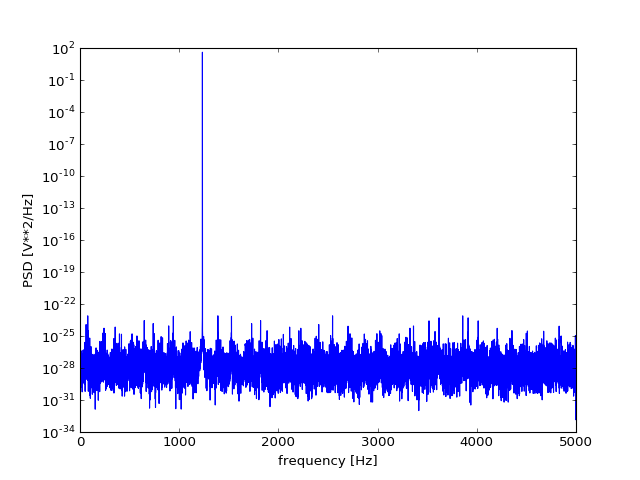

In [101]:
f, Pxx_den = periodogram(x, fs)

fig, ax = plt.subplots()
ax.semilogy(f, Pxx_den)
ax.set_xlabel('frequency [Hz]')
ax.set_ylabel('PSD [V**2/Hz]')
fig.show()

<IPython.core.display.Javascript object>


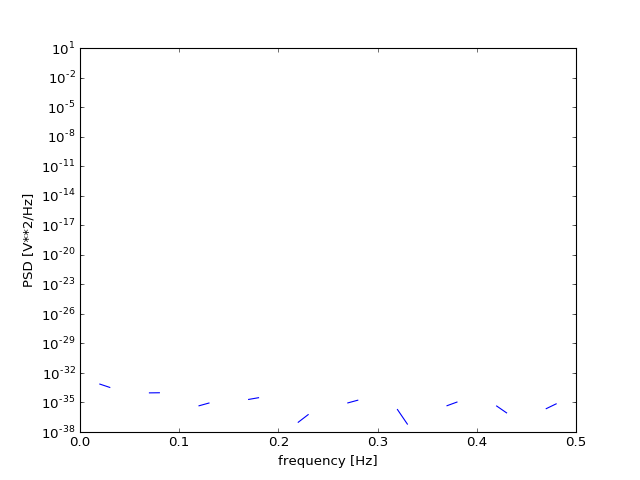

In [103]:
# TRY

from scipy.signal import periodogram

x = [0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,
     0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,
     0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,]

f, Pxx = periodogram(x, fs=1)
fig, ax = plt.subplots()
ax.semilogy(f, Pxx)
ax.set_xlabel('frequency [Hz]')
ax.set_ylabel('PSD [V**2/Hz]')
fig.show()

In [89]:
# For a single client

df_temp = df[ (df['srcip']=='10.8.21.156') & (df['dnsquery']=='iphone-cdn-client.fitbit.com') ]

df_temp

time        srcip     dstip                      dnsquery
10667     31.775905  10.8.21.156  10.8.0.5  iphone-cdn-client.fitbit.com
332589   950.169391  10.8.21.156  10.8.0.5  iphone-cdn-client.fitbit.com
618687  1871.280133  10.8.21.156  10.8.0.5  iphone-cdn-client.fitbit.com
885184  2792.914485  10.8.21.156  10.8.0.5  iphone-cdn-client.fitbit.com

In [ ]:
f, Pxx = periodogram(df_temp['time'], fs=2)
fig, ax = plt.subplots()
ax.plot(f, Pxx, marker='o')
ax.set_xlabel('frequency [Hz]')
ax.set_ylabel('PSD')
ax.grid(1)
fig.show()

In [68]:
df_temp

time        srcip     dstip  \
10667      31.775905  10.8.21.156  10.8.0.5   
60037     164.071339  10.8.21.156  10.8.0.5   
291156    820.595595  10.8.21.156  10.8.0.5   
291833    822.778054  10.8.21.156  10.8.0.5   
291834    822.778065  10.8.21.156  10.8.0.5   
332589    950.169391  10.8.21.156  10.8.0.5   
333130    952.072736  10.8.21.156  10.8.0.5   
333131    952.072747  10.8.21.156  10.8.0.5   
364894   1055.871540  10.8.21.156  10.8.0.5   
364993   1056.311709  10.8.21.156  10.8.0.5   
364994   1056.311720  10.8.21.156  10.8.0.5   
365184   1057.128845  10.8.21.156  10.8.0.5   
365185   1057.128855  10.8.21.156  10.8.0.5   
366011   1060.507001  10.8.21.156  10.8.0.5   
366012   1060.507012  10.8.21.156  10.8.0.5   
367015   1064.057817  10.8.21.156  10.8.0.6   
367016   1064.057828  10.8.21.156  10.8.0.6   
367017   1064.057831  10.8.21.156  10.8.0.6   
367018   1064.057869  10.8.21.156  10.8.0.5   
401282   1177.211902  10.8.21.156  10.8.0.5   
575290   1725.881300  10.8.21.156  10.8.0.5   
575291   1725.881310  10.8.21.156  10.8.0.5   
575296   1725.886688  10.8.21.156  10.8.0.5   
618687   1871.280133  10.8.21.156  10.8.0.5   
771865   2386.117728  10.8.21.156  10.8.0.5   
772190   2387.428073  10.8.21.156  10.8.0.5   
772191   2387.428084  10.8.21.156  10.8.0.5   
772281   2387.820204  10.8.21.156  10.8.0.5   
772614   2389.024674  10.8.21.156  10.8.0.5   
772615   2389.024684  10.8.21.156  10.8.0.5   
772616   2389.024688  10.8.21.156  10.8.0.5   
885184   2792.914485  10.8.21.156  10.8.0.5   
886366   2798.008253  10.8.21.156  10.8.0.5   
886367   2798.008264  10.8.21.156  10.8.0.5   
886369   2798.015156  10.8.21.156  10.8.0.6   
886370   2798.015167  10.8.21.156  10.8.0.6   
1071991  3502.489861  10.8.21.156  10.8.0.5   
1072168  3503.346636  10.8.21.156  10.8.0.5   

                                                  dnsquery  
10667                         iphone-cdn-client.fitbit.com  
60037                                     app.snapchat.com  
291156                               init.itunes.apple.com  
291833                                        xp.apple.com  
291834                               sync.itunes.apple.com  
332589                        iphone-cdn-client.fitbit.com  
333130                           iphone-cdn-api.fitbit.com  
333131                           iphone-cdn-api.fitbit.com  
364894                        itunes.apple.com.edgekey.net  
364993                 configuration.apple.com.edgekey.net  
364994                                gsp-ssl.ls.apple.com  
365184                      xp.itunes-apple.com.akadns.net  
365185                         partiality.itunes.apple.com  
366011                                        sr.symcd.com  
366012                                        sr.symcd.com  
367015                                        sr.symcd.com  
367016                                    iadsdk.apple.com  
367017                                    iadsdk.apple.com  
367018                                    iadsdk.apple.com  
401282   p18-keyvalueservice-current.edge.icloud.apple-...  
575290                                  time-ios.apple.com  
575291                                  time-ios.apple.com  
575296                              time-ios.g.aaplimg.com  
618687                        iphone-cdn-client.fitbit.com  
771865                              e7121.g.akamaiedge.net  
772190                                    api.facebook.com  
772191                              edge-mqtt.facebook.com  
772281                          edge3.icloud.apple-dns.net  
772614                                gsp-ssl.ls.apple.com  
772615                              cdn.cvws.apple-dns.net  
772616                                gsp-ssl.ls.apple.com  
885184                        iphone-cdn-client.fitbit.com  
886366                           iphone-cdn-api.fitbit.com  
886367                           iphone-cdn-api.fitbit.com  
886369                           iphone-cdn-api

10.6.48.10 [127.272126, 142.976088, 157.57881800000001, 157.59099900000001, 241.52380099999999, 301.019924, 301.04893499999997, 347.729918, 368.65544199999999, 418.46403099999998, 433.72051099999999, 488.11025000000001, 488.11155600000001, 592.63776199999995, 601.45784700000002, 601.48823800000002, 601.51403600000003, 623.06331299999999, 623.06944699999997, 623.069883, 648.42158199999994, 660.26388799999995, 663.39298799999995, 663.85913400000004, 668.36358099999995, 678.54643099999998, 678.65056800000002, 728.63039300000003, 728.68350599999997, 735.73305300000004, 743.15983800000004, 759.68252500000006, 772.99254399999995, 852.187591, 867.648324, 913.27921000000003, 914.59358299999997, 914.62005099999999, 1018.8660180000001, 1081.751681, 1081.778198, 1085.9441139999999, 1114.2643129999999, 1192.651832, 1193.0757599999999, 1236.6840199999999, 1335.3949970000001, 1359.0224949999999, 1359.0994089999999, 1392.4920850000001, 1392.6747290000001, 1398.571727, 1490.3362569999999, 1501.6385600

<IPython.core.display.Javascript object>


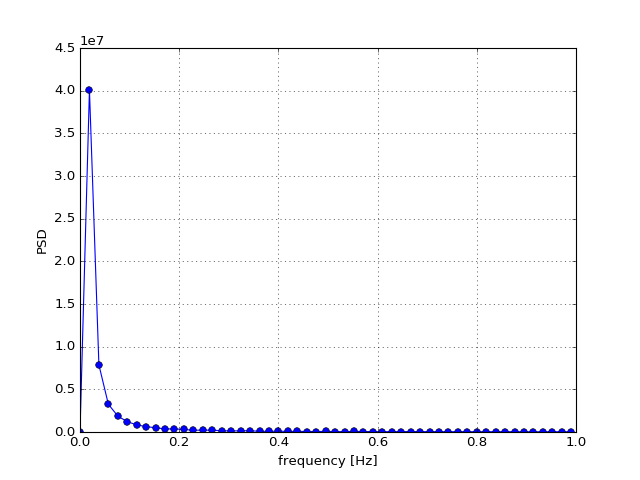

10.6.48.100 [128.12473299999999, 133.10966300000001, 645.11701500000004, 672.94645200000002, 677.11918400000002, 1328.151153, 2452.611879, 2452.6146789999998, 2452.615119, 2472.984015, 2479.9843470000001, 2479.9866950000001, 2480.088092, 2480.0929270000001, 2480.4401509999998, 2484.6179350000002, 2510.3599559999998, 3373.003757, 3378.1416819999999, 3378.1439009999999, 3416.6335140000001]


<IPython.core.display.Javascript object>


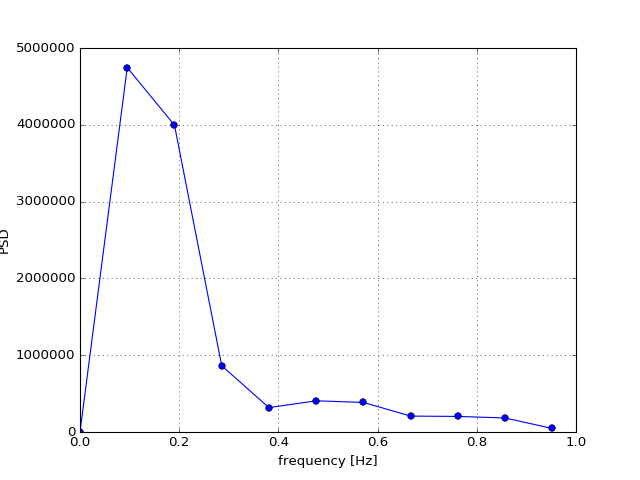

10.6.48.103 [69.108838000000006, 69.111378000000002, 684.13058100000001, 1926.5797620000001, 1934.08951, 1934.3961710000001, 1934.397567, 1934.50659, 1935.2046700000001, 2216.8344200000001, 2459.0704700000001, 2459.0722970000002, 2475.416408, 3384.157588]


<IPython.core.display.Javascript object>


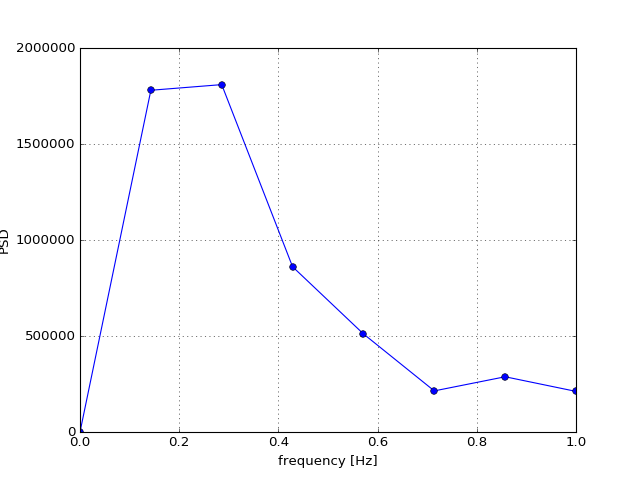

10.6.48.104 [714.03073300000005, 714.03317000000004, 792.16161499999998, 2592.1833499999998, 3099.5918649999999, 3099.5943179999999, 3100.2341700000002, 3100.2356380000001, 3100.3451639999998, 3100.4702649999999, 3492.1948590000002]


<IPython.core.display.Javascript object>


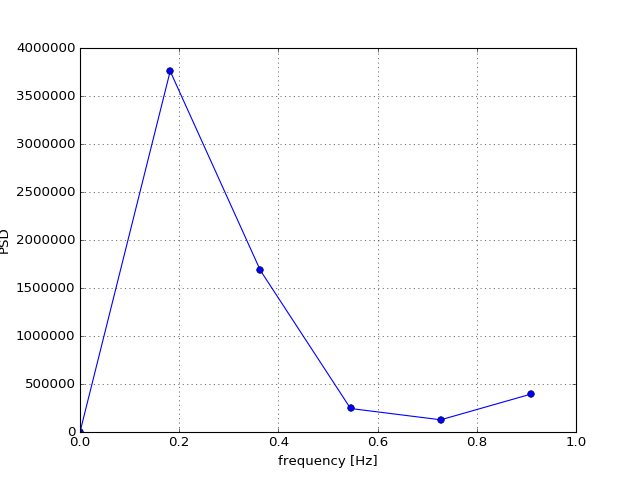

10.6.48.105 [531.41620899999998, 2267.4830019999999, 2273.0084870000001, 2273.011184, 2331.4368060000002, 2511.428993, 2511.4322069999998, 3202.4364569999998, 3202.5366960000001, 3202.8528729999998, 3202.9795039999999, 3203.4070400000001, 3556.1825469999999, 3556.1843039999999]


<IPython.core.display.Javascript object>


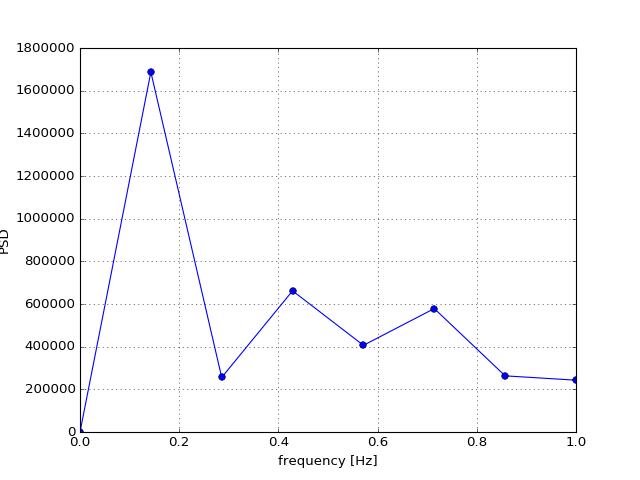

10.6.48.106 [108.69897, 1008.727313, 1892.123732, 1892.1264329999999, 1908.7560450000001]


<IPython.core.display.Javascript object>


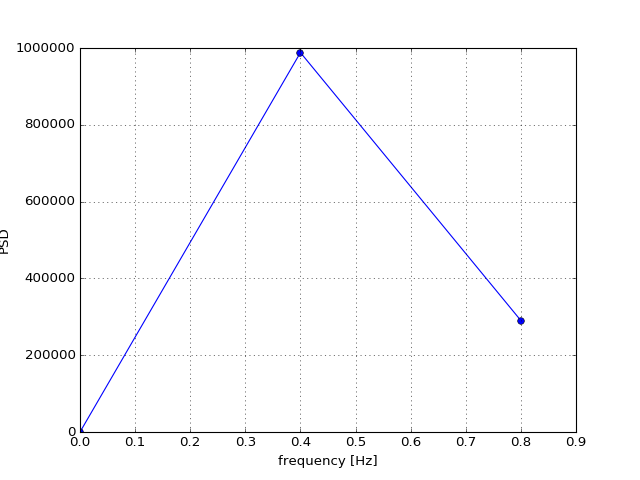

10.6.48.107 [519.56807200000003, 712.29885999999999, 745.18909699999995, 766.46449500000006, 1060.6723790000001, 1601.836407, 1912.3224540000001, 2142.9762820000001, 2411.6168619999999, 2411.716606, 2412.0496830000002, 2412.1636020000001, 2412.6024969999999, 2412.826986, 2684.0743170000001, 2705.053144, 3225.2298639999999, 3225.2901440000001, 3442.7360960000001, 3442.7402360000001, 3445.323562, 3447.5196310000001, 3448.170963, 3478.1214030000001]


<IPython.core.display.Javascript object>


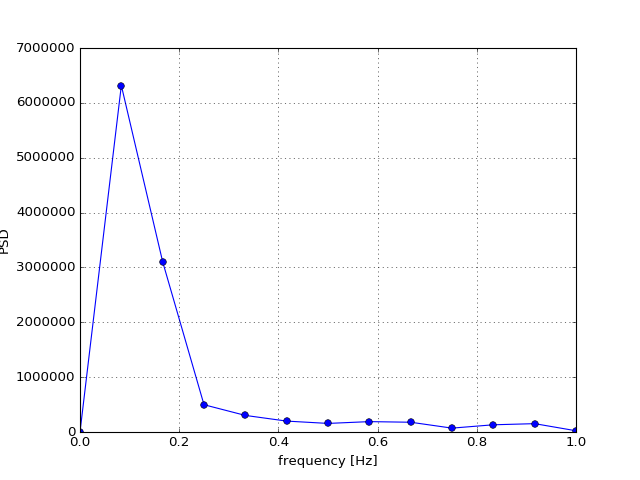

10.6.48.108 [781.59450500000003]


<IPython.core.display.Javascript object>


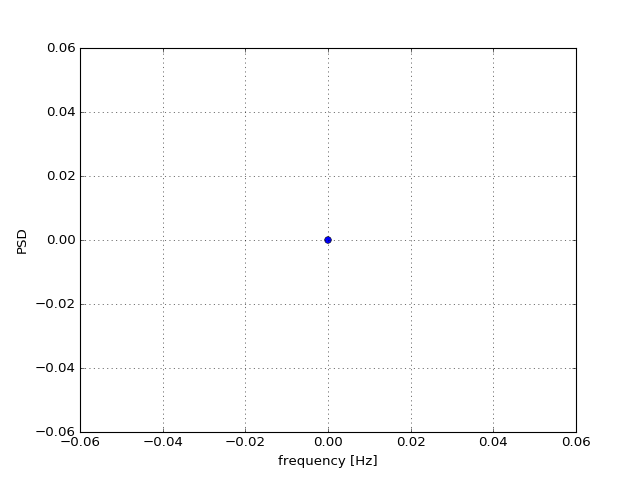

10.6.48.109 [611.93057899999997, 711.29388500000005, 711.29753300000004, 2411.9712639999998, 3281.3181140000002, 3281.3205160000002, 3285.939523, 3286.426786]


<IPython.core.display.Javascript object>


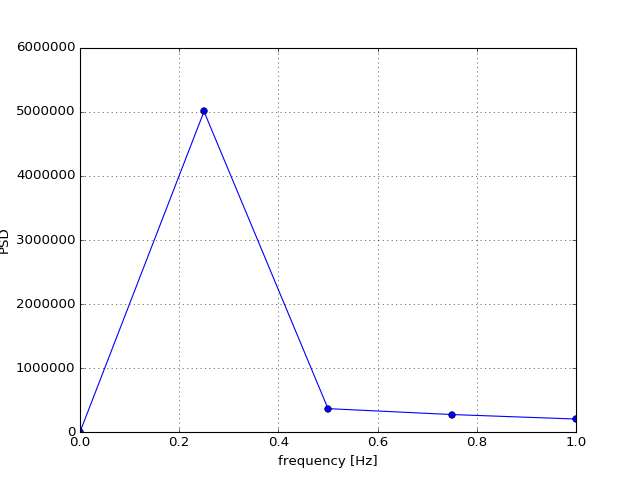

10.6.48.11 [104.725825, 104.72847, 712.645713, 1231.538339, 1231.645495, 1232.686359, 1232.839806, 1806.743845, 3113.2892449999999, 3233.4550559999998, 3579.9355869999999, 3579.9376699999998]


<IPython.core.display.Javascript object>


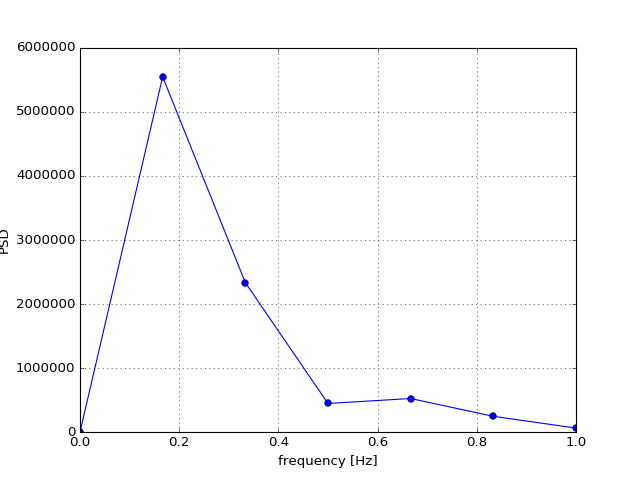

10.6.48.110 [406.88343800000001, 1642.8883699999999]


<IPython.core.display.Javascript object>


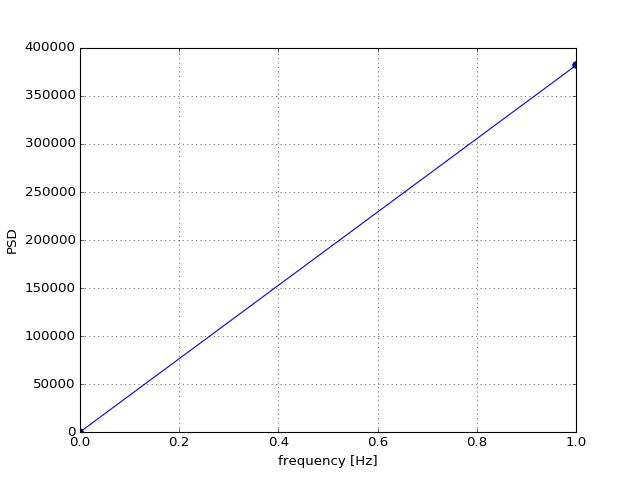

10.6.48.112 [37.621189999999999, 870.65746000000001, 870.65949899999998, 937.65274399999998, 1837.682495]


<IPython.core.display.Javascript object>


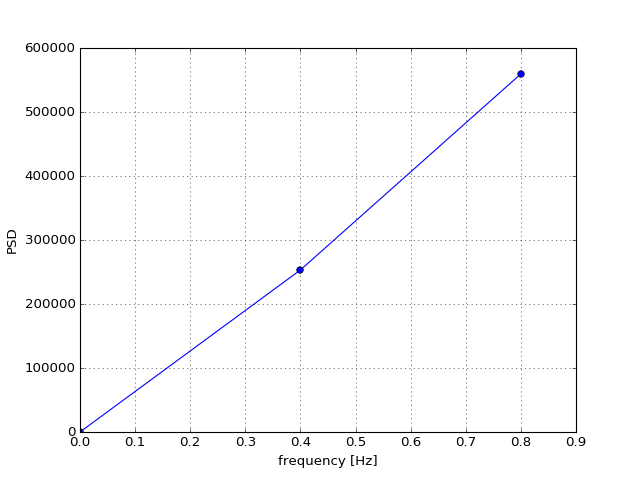

10.6.48.114 [568.89356699999996, 568.93747900000005, 666.69568100000004, 1615.7144229999999, 1634.6008260000001, 1653.3206580000001, 2353.9340980000002, 2353.9512209999998, 2466.7625210000001, 3366.8069220000002, 3462.06023, 3462.6079810000001, 3463.0131550000001, 3463.1711019999998]


<IPython.core.display.Javascript object>


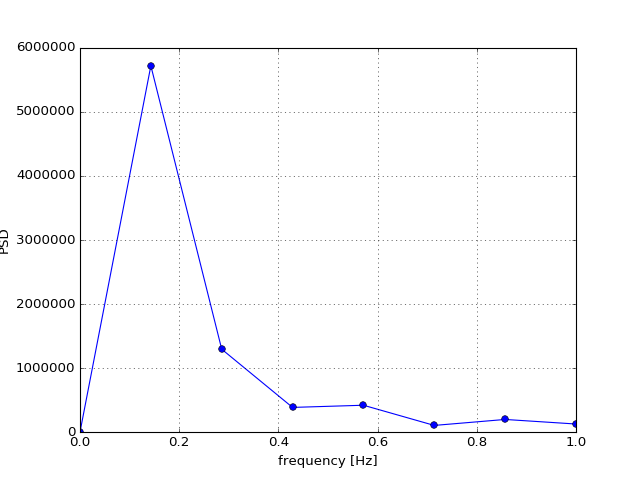

10.6.48.115 [237.30488099999999, 237.30877000000001, 682.72116700000004, 2460.2032199999999, 2460.2058379999999, 2477.081745, 2477.5905480000001, 2482.7695170000002, 3382.7900909999998]


/usr/local/lib/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


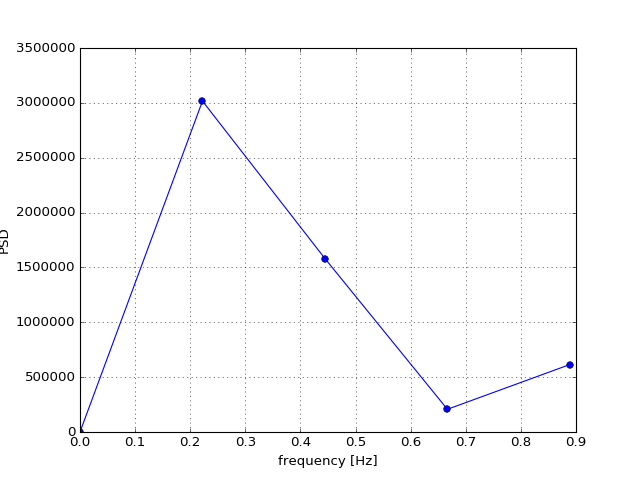

10.6.48.116 [391.28695399999998, 393.10730000000001, 393.11224700000002, 468.63877400000001, 998.33679199999995, 998.33993799999996, 1368.6959589999999, 2268.750642, 3168.8055469999999, 3578.4038420000002, 3580.3049209999999, 3580.3067099999998, 3580.4189179999998, 3580.5271769999999, 3580.63852, 3582.9025590000001]


<IPython.core.display.Javascript object>


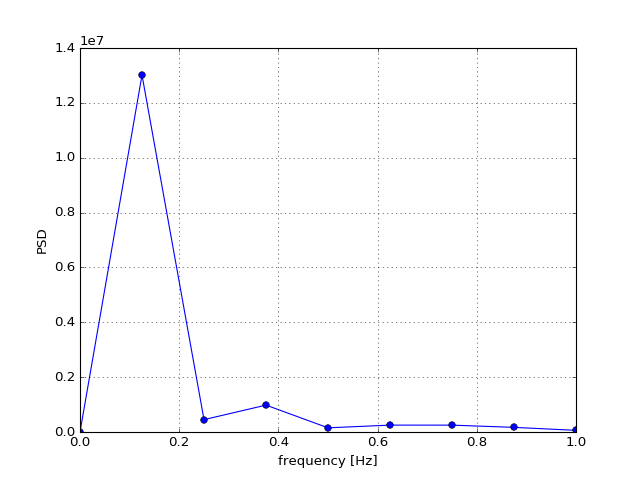

10.6.48.12 [21.203951, 22.068398999999999, 22.068830999999999, 22.071840000000002, 22.072246, 22.072967999999999, 22.094904, 37.059987, 37.060254, 37.061518, 37.062663000000001, 37.063378999999998, 37.064081999999999, 37.065103000000001, 37.065834000000002, 37.066271999999998, 37.069505999999997, 37.072595999999997, 37.075960000000002, 37.090144000000002, 37.091827000000002, 37.111449999999998, 37.111956999999997, 37.115046, 44.044744000000001, 44.045580999999999, 44.046151999999999, 44.046788999999997, 45.013184000000003, 45.013472, 45.013821, 45.014797999999999, 45.020631999999999, 45.023159999999997, 45.025674000000002, 47.001280000000001, 47.004969000000003, 47.006124999999997, 47.006551000000002, 47.007291000000002, 57.992049999999999, 57.998055999999998, 58.997494000000003, 58.997826000000003, 58.998823999999999, 59.006413000000002, 59.009062999999998, 59.018239000000001, 59.975436999999999, 59.976042999999997, 73.277448000000007, 78.092170999999993, 78.092777999999996, 78.093070

<IPython.core.display.Javascript object>


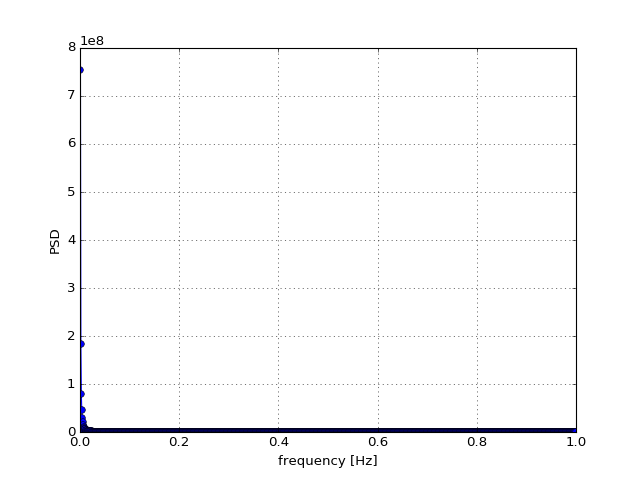

10.6.48.122 [425.55109099999999, 432.67812500000002, 432.67843099999999, 462.61804100000001, 643.137607, 643.14027299999998, 698.57384500000001, 698.57882800000004, 705.34589700000004, 966.93561399999999, 1508.2354009999999, 1707.714011, 1858.173194, 2049.533574, 2486.0680179999999, 2486.1849480000001, 2486.4940620000002, 2486.4960809999998, 2487.0433939999998, 2590.887275, 2907.7416720000001, 3078.9142499999998, 3405.4071749999998]


<IPython.core.display.Javascript object>


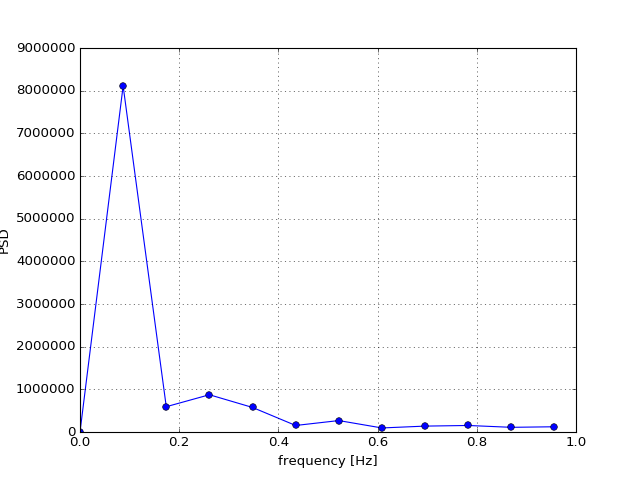

10.6.48.123 [377.78680900000001, 377.78971100000001, 442.68735400000003, 1342.7002970000001, 1415.6519450000001, 1416.066795, 1416.1790129999999, 1416.6016460000001, 2242.7136700000001, 3111.4065190000001, 3111.408484, 3134.343891, 3134.7823320000002, 3142.7268800000002, 3164.7553210000001, 3164.7566919999999, 3197.8447150000002]


<IPython.core.display.Javascript object>


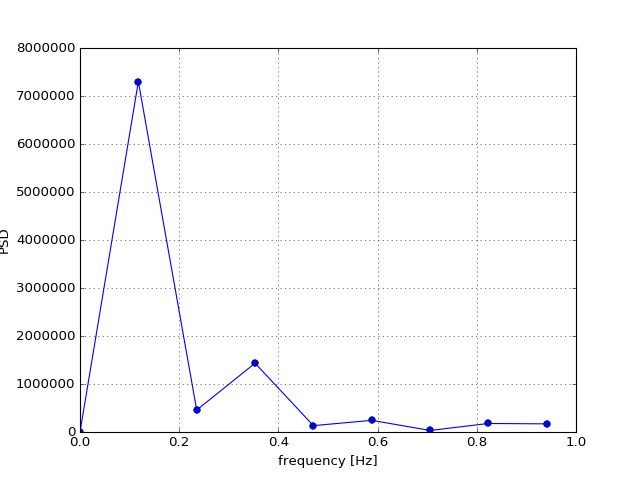

10.6.48.126 [772.25456399999996, 1082.256423]


<IPython.core.display.Javascript object>


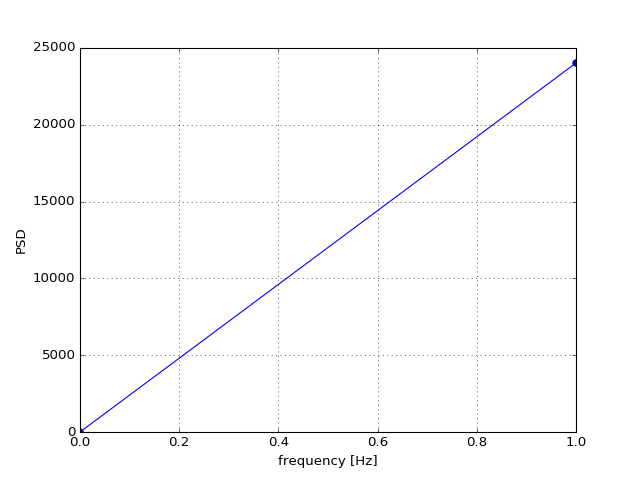

10.6.48.13 [45.886102000000001, 45.889057000000001, 45.891530000000003, 260.29308600000002, 320.31595600000003, 328.95309300000002, 328.95516300000003, 739.95542899999998, 775.80471599999998, 815.36404600000003, 868.18507799999998, 868.20200899999998, 868.50779, 868.50927200000001, 868.72217699999999, 869.154901, 905.399136, 1002.04581, 1299.8570090000001, 1299.859944, 1319.910781, 1362.0316560000001, 1362.032377, 1400.414726, 1460.436383, 1939.971767, 1955.46299, 1976.1453080000001, 2045.499583, 2092.8969529999999, 2092.917179, 2093.2230880000002, 2093.2248850000001, 2093.2344069999999, 2540.5352680000001, 2600.558704, 2834.6300700000002, 2834.6330210000001, 2834.6367279999999, 2874.922587, 2874.9475910000001, 2874.9588199999998, 2933.0497449999998, 3048.0844350000002, 3059.4435720000001, 3095.578653, 3125.5902970000002, 3139.9875809999999, 3162.044316, 3185.613171, 3231.3907730000001, 3231.9062549999999, 3232.015265, 3232.4340010000001, 3233.0204440000002, 3596.476404, 3596.477922999

<IPython.core.display.Javascript object>


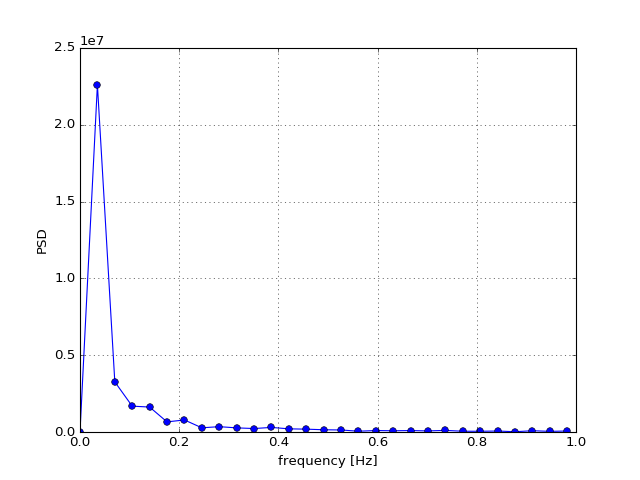

10.6.48.131 [283.03981199999998, 283.14763399999998, 283.76698099999999, 284.04585800000001, 826.08202200000005, 2476.2690929999999, 2476.2710149999998, 2493.9469650000001, 2510.6876280000001, 2510.6909169999999, 2626.1146709999998, 3432.0867440000002, 3432.0903950000002, 3526.1337739999999]


<IPython.core.display.Javascript object>


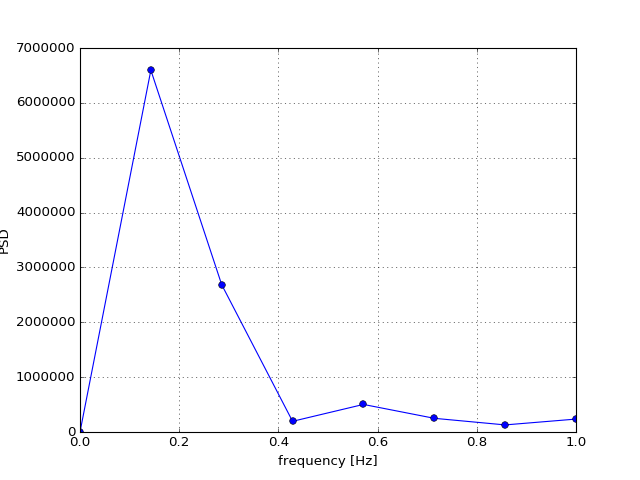

10.6.48.132 [60.498932000000003, 716.36957600000005, 984.25978699999996, 1698.77225, 2184.3545709999999, 2369.1670370000002, 2452.9092270000001, 2455.4728559999999, 2455.4750840000002, 2478.0256370000002, 2478.448652, 2508.4615950000002, 2508.4628779999998, 2516.4645350000001, 2674.1542180000001, 3201.7738319999999, 3384.5326230000001, 3416.4736779999998]


<IPython.core.display.Javascript object>


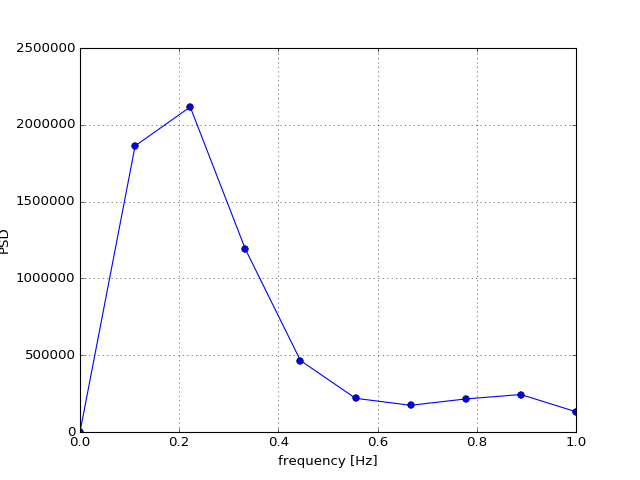

10.6.48.133 [933.52421300000003, 1090.5506829999999, 1090.5542519999999, 1687.8280500000001, 2132.7929779999999, 2132.8554669999999, 2133.577714, 2620.4035789999998, 2620.8206230000001, 2620.9320299999999, 3123.0156999999999, 3126.0998100000002, 3126.1024349999998, 3138.2164469999998, 3138.8951419999999, 3188.8657429999998, 3201.9597570000001, 3333.6243209999998]


<IPython.core.display.Javascript object>


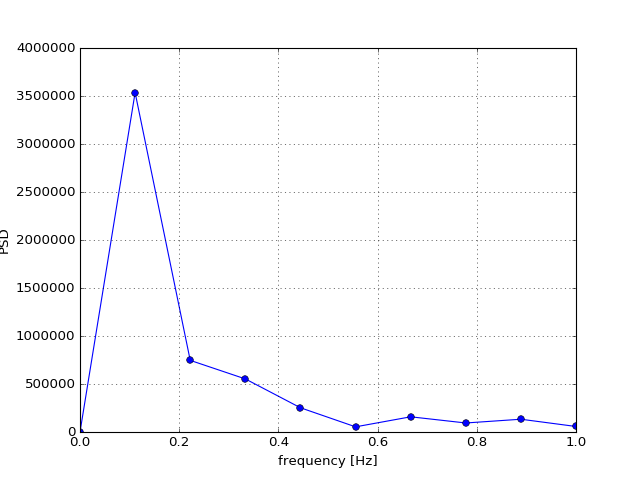

10.6.48.134 [285.425884, 1185.451996, 1966.5942359999999, 1966.596319, 2085.4778299999998]


<IPython.core.display.Javascript object>


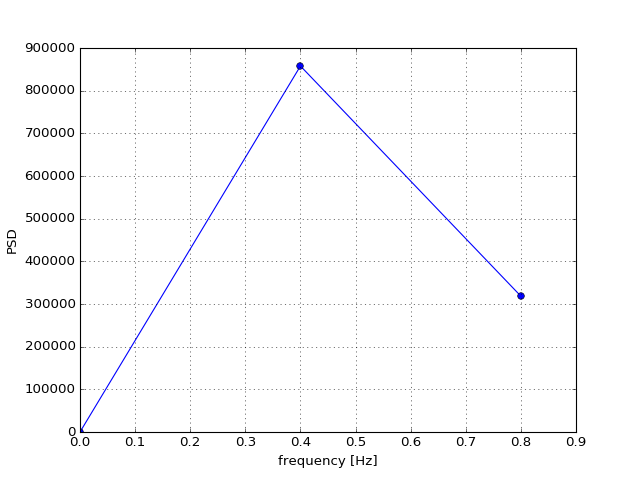

10.6.48.135 [67.541060999999999]


<IPython.core.display.Javascript object>


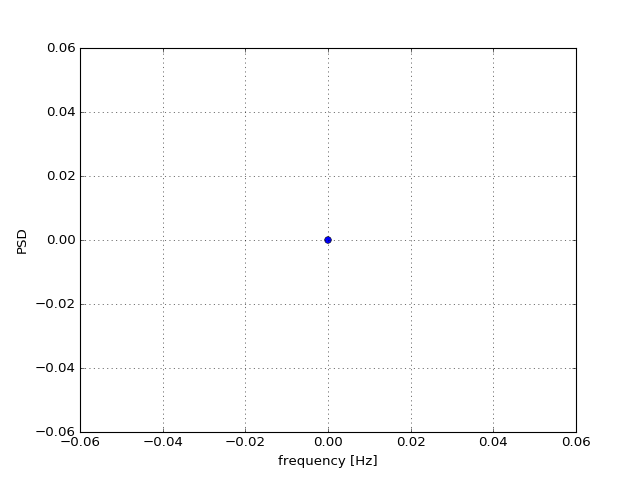

10.6.48.138 [139.505382, 332.306759, 680.54879600000004, 1221.5894780000001, 1356.8551150000001, 1762.6973310000001, 1804.644321, 2256.8657069999999, 2303.75216, 2406.6096429999998, 2905.7373109999999, 2905.7388740000001, 3130.760777, 3130.7635019999998, 3145.9481190000001, 3146.1608080000001, 3146.1635540000002, 3146.5859610000002, 3156.8746769999998, 3176.5669619999999, 3209.6285520000001, 3446.8370650000002]


<IPython.core.display.Javascript object>


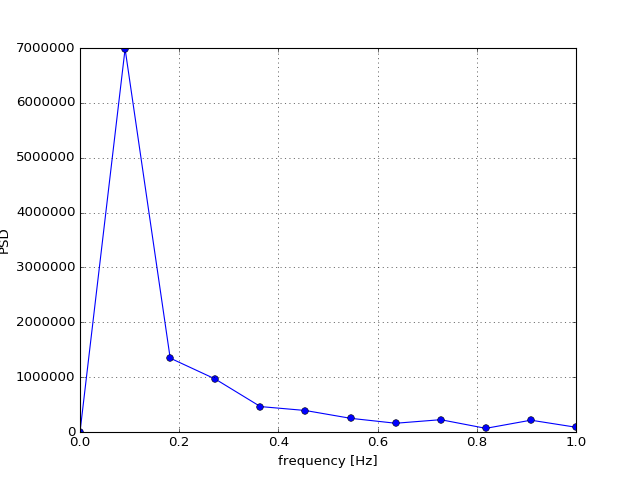

10.6.48.139 [74.565252999999998, 74.682103999999995, 74.713282000000007, 74.716521999999998, 74.721554999999995, 74.723312000000007, 74.898987000000005, 75.127182000000005, 76.137652000000003, 89.728234999999998, 89.731335999999999, 89.891193000000001, 89.894121999999996, 91.151471000000001, 91.306443000000002, 92.614039000000005, 98.437117000000001, 98.440552999999994, 98.608887999999993, 98.611968000000005, 98.636898000000002, 98.809864000000005, 694.427053, 720.59969599999999, 1895.418885, 2459.3888350000002, 2459.3911629999998, 2472.9563619999999, 2473.056294, 2473.3755900000001, 2473.9520950000001, 2481.4837670000002, 2585.392429, 3099.1756099999998, 3420.627285]


<IPython.core.display.Javascript object>


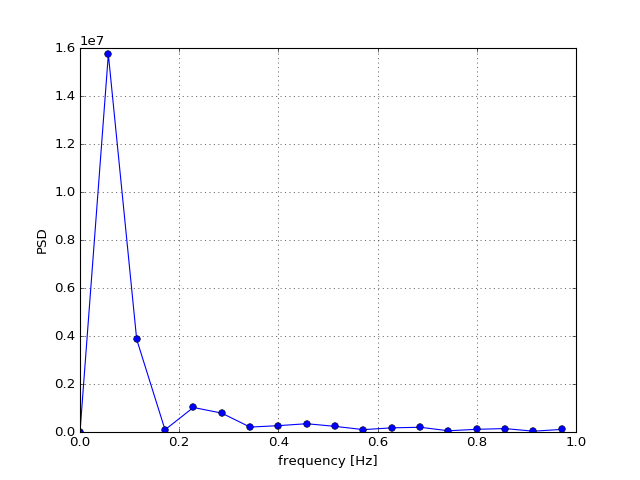

10.6.48.14 [17.187771000000001, 37.264946999999999, 77.326199000000003, 137.449116, 147.479197, 197.55510200000001, 217.61670599999999, 257.66195699999997, 317.784603, 327.831298, 377.92358999999999, 398.01525099999998, 438.076099, 498.18346600000001, 508.21520800000002, 558.32131600000002, 578.39840000000004, 618.45929999999998, 678.56739200000004, 688.597129, 738.67278499999998, 758.76571999999999, 762.403457, 798.827856, 858.94925499999999, 868.98094900000001, 879.02619900000002, 919.07164799999998, 939.16439800000001, 979.22535700000003, 1039.3323949999999, 1049.3629129999999, 1099.455774, 1119.5319400000001, 1159.592893, 1219.7006710000001, 1229.7473950000001, 1279.837794, 1299.899212, 1339.944653, 1400.1139290000001, 1410.1448499999999, 1460.2220930000001, 1480.2980700000001, 1520.358935, 1530.389913, 1540.65524, 1540.6577050000001, 1565.017922, 1565.024752, 1565.0269290000001, 1566.249108, 1580.4811560000001, 1590.513422, 1595.906559, 1596.041851, 1640.604139, 1660.6661570000001

<IPython.core.display.Javascript object>


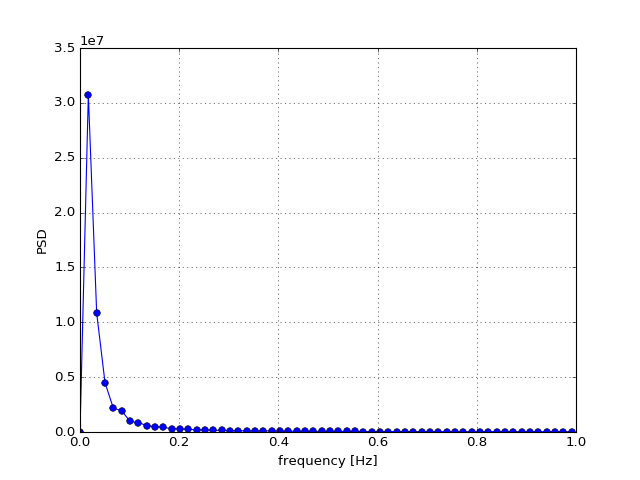

10.6.48.140 [174.07129900000001, 401.57281499999999, 401.57605000000001, 476.921693, 726.64024700000004, 726.64756, 726.64994999999999, 726.85615800000005, 726.869821, 726.87333100000001, 726.87630200000001, 727.28292899999997, 727.28479000000004, 727.68869299999994, 728.29676400000005, 741.86656100000005, 741.87012800000002, 743.29700200000002, 744.48273400000005, 744.48616800000002, 745.91435799999999, 750.58269600000006, 750.58631800000001, 750.79862900000001, 753.20293300000003, 753.20645500000001, 753.41787899999997, 774.11229600000001, 1974.1998100000001, 2276.987419, 2710.665743, 2711.0813629999998, 3121.2506050000002, 3121.2534329999999, 3135.006985, 3135.3465190000002, 3165.33428, 3165.3494179999998, 3174.4780510000001, 3177.0212769999998, 3198.4085709999999]


<IPython.core.display.Javascript object>


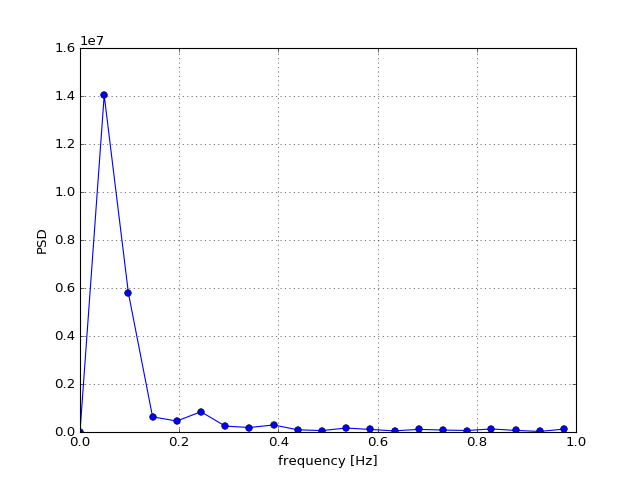

10.6.48.142 [528.78690500000005, 568.88611100000003, 568.88891100000001, 602.81836699999997, 1069.92578, 1610.9972029999999, 2152.07609, 2152.0793359999998, 2402.8792699999999, 2693.1475009999999, 2714.121983, 3234.2916599999999, 3282.4164510000001, 3282.4186300000001, 3287.8202110000002, 3288.394139, 3302.9117740000002, 3318.3813679999998, 3427.1139920000001]


<IPython.core.display.Javascript object>


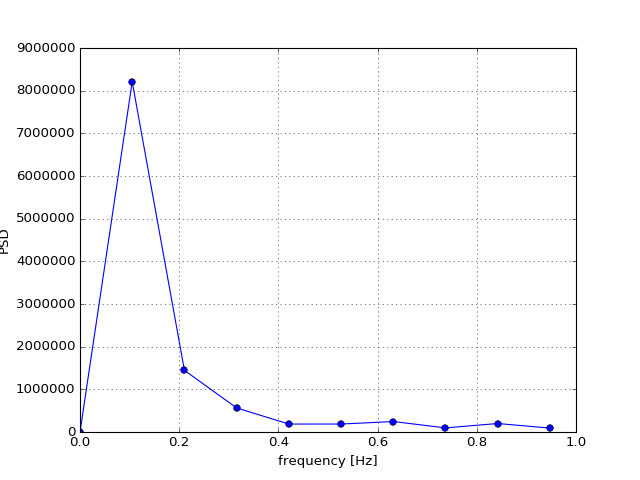

10.6.48.143 [324.87870299999997, 1095.0289330000001, 1095.0314949999999, 1095.1453750000001, 1125.2537809999999, 1146.1269830000001, 1146.12718, 1146.8111510000001, 1146.8131920000001, 1147.525306, 1305.6592969999999, 1494.4757950000001, 1497.8535360000001, 2082.6041270000001, 2082.6062550000001, 2133.6256360000002, 3033.7017890000002]


<IPython.core.display.Javascript object>


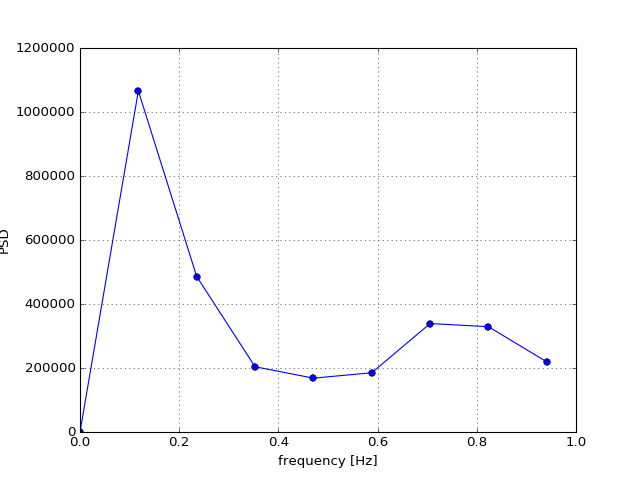

10.6.48.146 [372.11571500000002, 372.11826300000001, 3537.5643209999998, 3537.5663169999998]


<IPython.core.display.Javascript object>


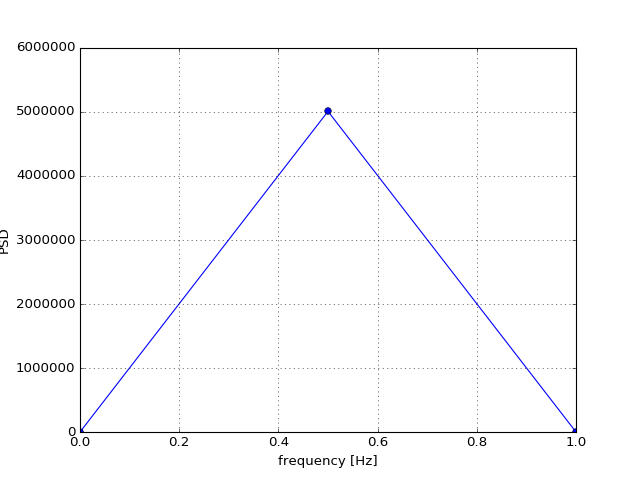

10.6.48.147 [18.604816, 20.996946999999999, 23.908031000000001, 27.5002, 34.147517000000001, 60.056261999999997, 60.148359999999997, 75.073555999999996, 78.996206999999998, 84.854495999999997, 87.624609000000007, 89.887665999999996, 91.655889999999999, 91.681194000000005, 94.256947999999994, 95.503082000000006, 95.611727000000002, 100.56433800000001, 104.032533, 113.044265, 114.732085, 117.924279, 120.773477, 122.06093799999999, 123.584143, 127.95045500000001, 128.89187200000001, 129.636875, 130.09242499999999, 130.301006, 131.21556000000001, 132.12741800000001, 137.12783899999999, 137.17317800000001, 147.464992, 154.16773000000001, 158.548543, 164.271398, 164.36446799999999, 169.333765, 169.79184900000001, 174.40915699999999, 178.299825, 178.58568700000001, 183.278054, 184.527098, 185.49194800000001, 188.43423200000001, 194.51660699999999, 195.72193899999999, 204.03110599999999, 208.07444100000001, 218.82029299999999, 218.88426999999999, 221.73710800000001, 223.14714000000001, 223.508

<IPython.core.display.Javascript object>


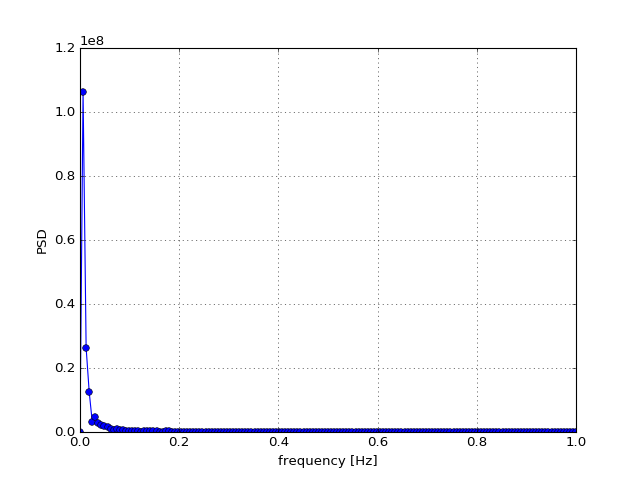

10.6.48.148 [225.57770099999999, 229.00635600000001, 271.41730799999999, 289.729873, 366.49842999999998, 502.57613500000002, 968.53803900000003, 1102.5762569999999, 1106.243393, 1106.2490620000001, 1125.5904, 1489.744653, 1570.5109130000001, 1611.5625339999999, 1611.5656220000001, 2025.6196339999999, 2057.5939039999998, 2071.7393360000001, 2172.541952, 2732.601823, 2774.498685, 3376.4836089999999, 3517.4274759999998]


<IPython.core.display.Javascript object>


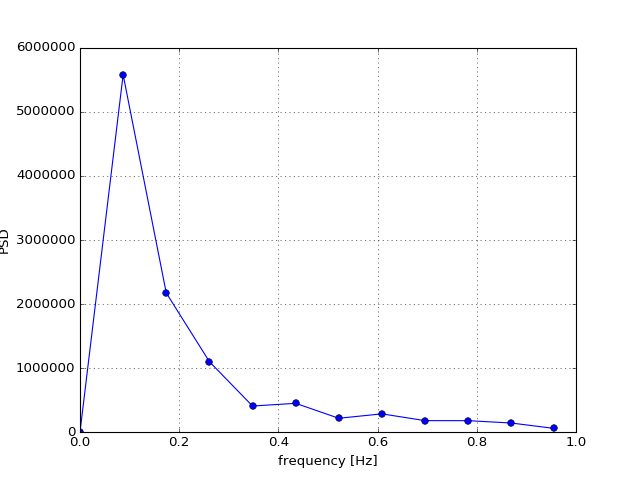

10.6.48.15 [10.760061, 15.97415, 70.917355000000001, 130.75546700000001, 190.753118, 250.55218199999999, 310.81286499999999, 370.75716499999999, 430.63071300000001, 490.82099899999997, 503.98848400000003, 550.788768, 610.55150000000003, 670.63403300000004, 730.77785700000004, 790.66408000000001, 807.29458499999998, 850.59649300000001, 910.72917199999995, 929.72637699999996, 934.27654099999995, 970.60268099999996, 1030.7010760000001, 1090.5560410000001, 1150.596528, 1210.5551809999999, 1270.756967, 1330.6249439999999, 1390.626031, 1450.6021009999999, 1511.008186, 1570.6971570000001, 1630.5921840000001, 1690.614153, 1750.6987099999999, 1753.589559, 1810.589931, 1855.149422, 1870.666074, 1930.563805, 1990.680728, 2050.589602, 2096.1321210000001, 2110.638688, 2170.6071139999999, 2230.7951870000002, 2252.2620809999999, 2252.2641309999999, 2290.6418490000001, 2350.6236050000002, 2410.8883430000001, 2470.6185700000001, 2530.5782869999998, 2582.2093690000002, 2582.2121189999998, 2590.629538000

<IPython.core.display.Javascript object>


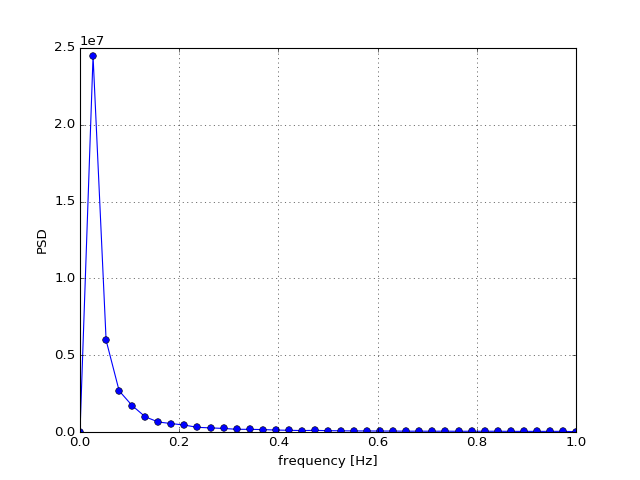

10.6.48.151 [2532.3447470000001, 3564.3497539999998]


<IPython.core.display.Javascript object>


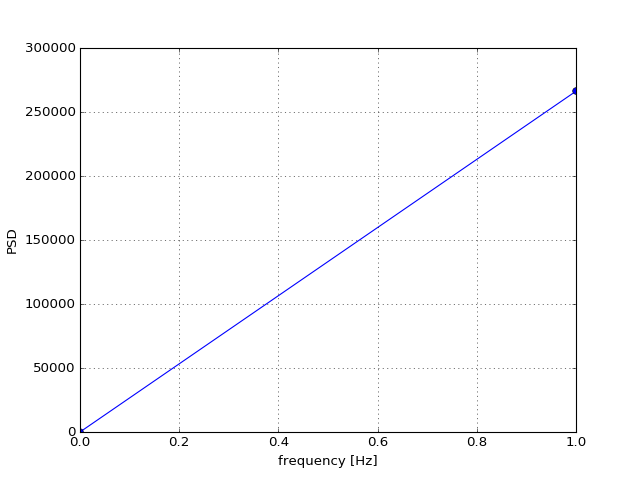

10.6.48.154 [850.89139299999999, 850.893957, 859.72274000000004, 1759.749703, 1868.71604, 1868.7191110000001, 2439.5601430000002, 2440.0981139999999, 2440.0998249999998, 2440.1155570000001, 3081.5431330000001, 3081.5603030000002, 3085.2563129999999, 3085.2585869999998, 3559.8077549999998]


<IPython.core.display.Javascript object>


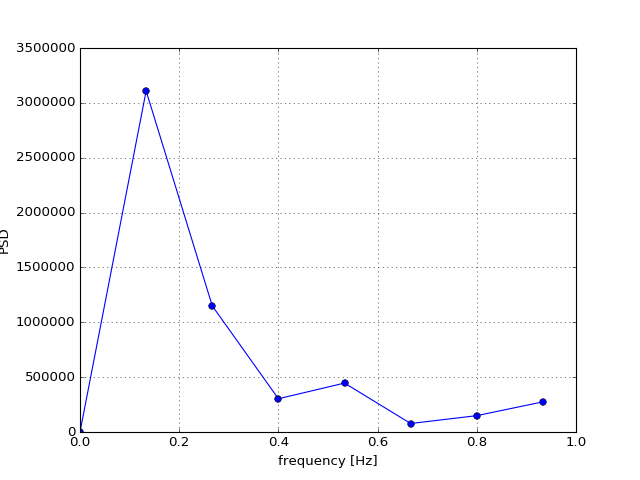

10.6.48.155 [320.62271299999998, 320.62272400000001, 574.276928, 574.27925500000003, 602.10726899999997, 861.73539900000003, 903.682908, 1402.7966779999999, 1544.373065, 1544.377868, 1544.5003610000001, 1595.6482289999999, 1943.9872069999999, 2402.1360829999999, 2485.1809929999999, 2914.9513229999998, 2915.0519749999999, 2915.264173, 2915.2667689999998, 2915.4796449999999, 2915.4819739999998, 2916.0074009999998, 2916.1369119999999, 3026.3319750000001, 3302.15166, 3344.5421860000001, 3567.4372170000001]


<IPython.core.display.Javascript object>


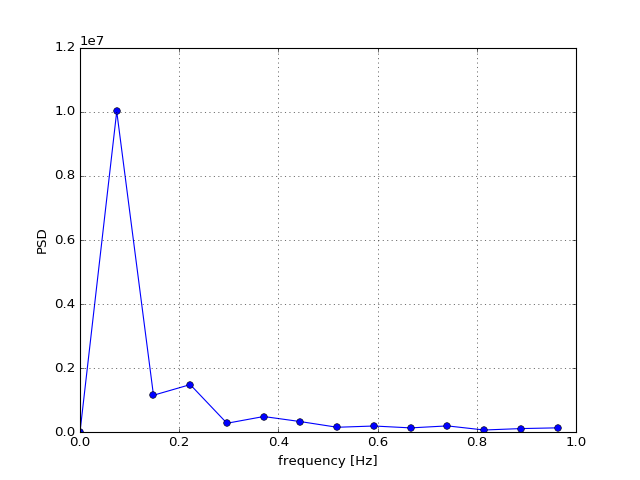

10.6.48.156 [94.094290000000001, 656.65358700000002, 1556.681214, 2456.7082789999999, 2589.3670529999999, 2737.402799, 2737.4113379999999, 2737.4154530000001, 2738.3046250000002, 3341.0820910000002, 3341.0846879999999, 3356.7352500000002]


<IPython.core.display.Javascript object>


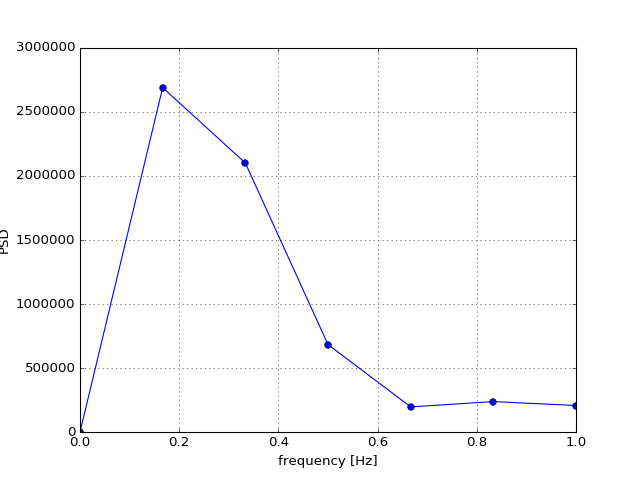

10.6.48.157 [321.97699399999999, 358.92115999999999, 358.93807399999997, 359.255518, 359.25705199999999, 359.37086399999998, 359.70750600000002, 494.04518200000001, 936.02860599999997, 936.03039200000001, 936.04913999999997, 936.47778100000005, 1035.168365, 1195.6191920000001, 1195.6213130000001, 1576.383135, 1576.3863289999999, 1903.876084, 1903.9761739999999, 1903.995316, 1904.3028449999999, 1904.304308, 1904.4274069999999, 2117.4804680000002, 2658.5670730000002, 2700.51746, 2851.4237549999998, 3022.0635280000001, 3199.7480209999999]


<IPython.core.display.Javascript object>


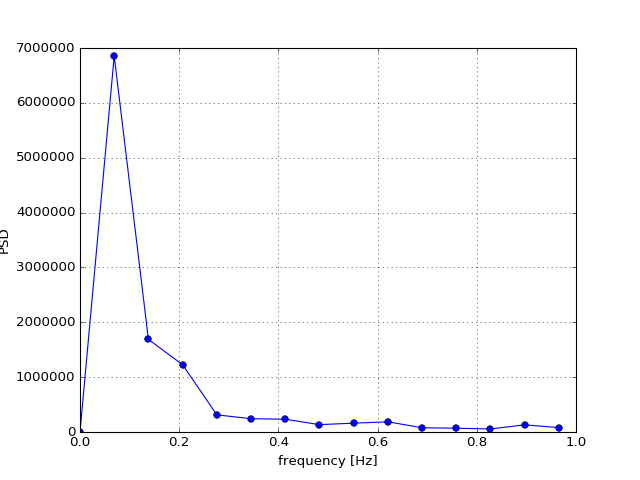

10.6.48.158 [182.18239, 182.18479300000001, 192.539312, 242.79840999999999, 284.74433800000003, 435.66485899999998, 767.61869000000002, 767.69541600000002, 779.96650099999999, 785.66572099999996, 789.49429799999996, 1092.565715, 1327.1322990000001, 1544.0565610000001, 1544.0600469999999, 1868.246562, 1992.591721, 2409.3152409999998, 2950.3910660000001, 2950.3938539999999, 3011.3626290000002, 3552.424841]


<IPython.core.display.Javascript object>


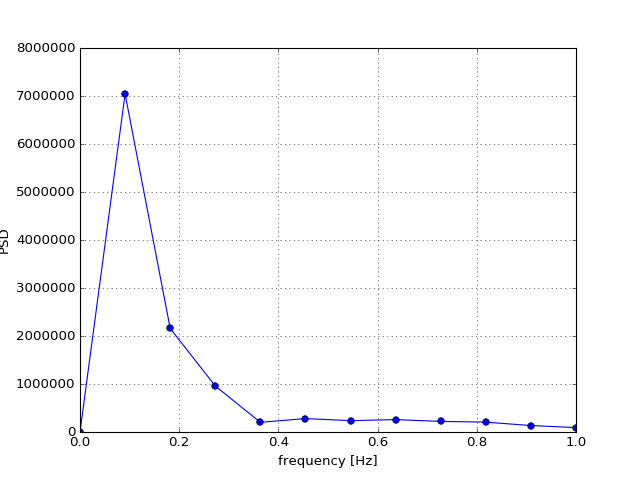

10.6.48.159 [119.66552299999999, 2123.5844219999999]


<IPython.core.display.Javascript object>


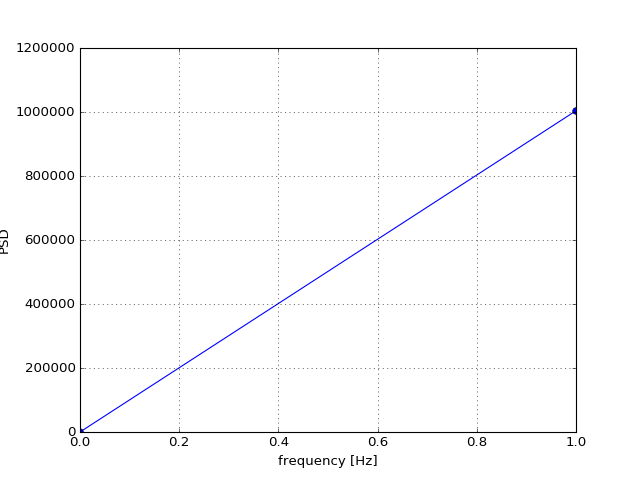

10.6.48.16 [190.59941599999999, 216.95523800000001, 217.39667, 217.507203, 711.99481900000001, 711.998289, 731.67583000000002, 1272.852637, 1400.757944, 1813.946099, 2300.7715170000001, 2355.0492330000002, 2355.0492429999999, 2896.1236560000002, 3172.9618740000001, 3172.9645660000001, 3192.8131429999999, 3192.8377310000001, 3193.0688150000001, 3193.071915, 3193.0968750000002, 3193.6636509999998, 3200.7990679999998, 3437.2834779999998]


<IPython.core.display.Javascript object>


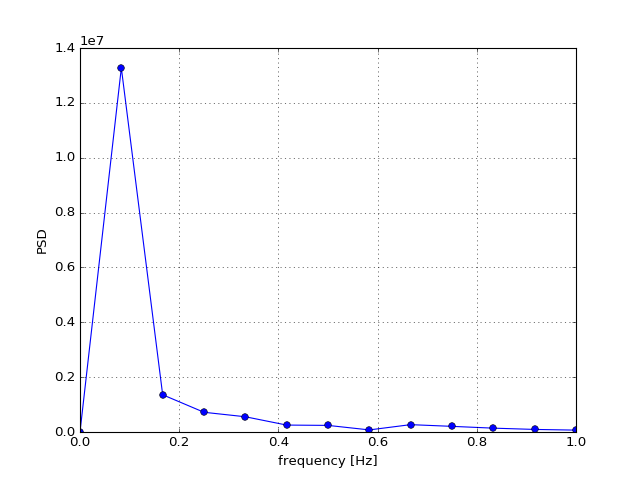

10.6.48.160 [806.46715600000005, 806.46716700000002, 1040.3826349999999]


<IPython.core.display.Javascript object>


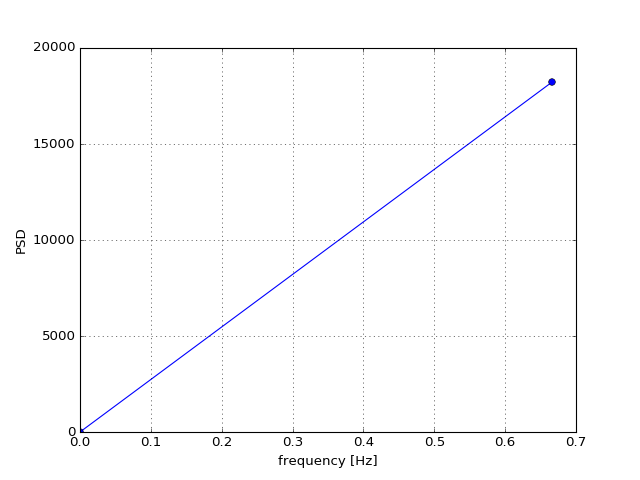

10.6.48.161 [806.28324799999996, 806.28325800000005, 2002.286096]


<IPython.core.display.Javascript object>


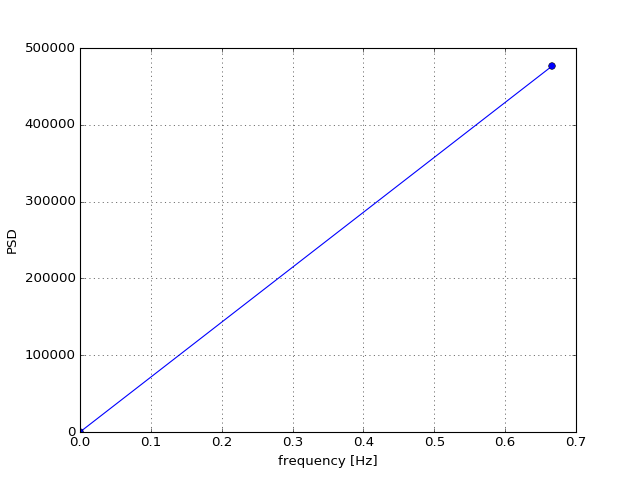

10.6.48.162 [711.25995, 711.26210600000002, 711.38210300000003, 728.94083699999999, 741.35613499999999, 1009.85297, 1009.856889, 1560.986337, 1560.9889969999999, 2529.0006119999998, 3429.031054]


<IPython.core.display.Javascript object>


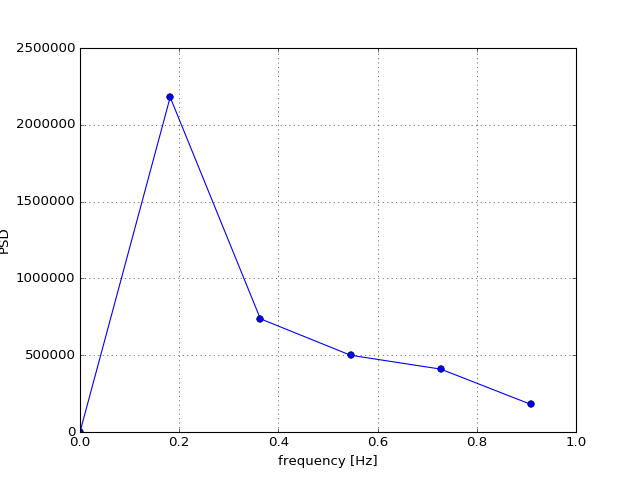

10.6.48.163 [92.144689999999997, 92.157047000000006, 92.311957000000007, 140.52571900000001, 140.64810399999999, 428.92873400000002, 428.93243899999999, 548.64196100000004, 2348.6785329999998, 3248.697287]


<IPython.core.display.Javascript object>


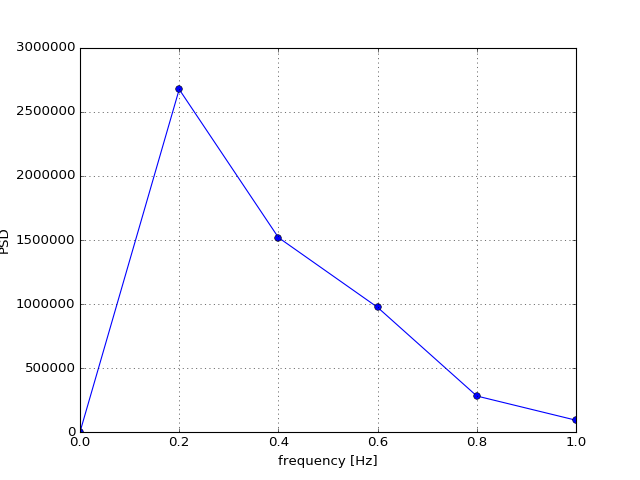

10.6.48.164 [52.985970000000002, 53.010967999999998, 215.58317199999999, 378.26724200000001, 408.53053799999998, 415.03070100000002, 415.03267699999998, 447.25010300000002, 474.28218800000002, 474.28276199999999, 541.06043199999999, 662.85759599999994, 825.19572900000003, 987.52670599999999, 1150.0615330000001, 1271.9297409999999, 1310.0104409999999, 1347.259996, 1375.774273, 1376.320252, 1376.936379, 1434.5338859999999, 1596.969153, 1676.29313, 1676.293948, 1690.0442840000001, 1759.7490519999999, 1849.0260559999999, 1885.806276, 2048.2337069999999, 2210.6936700000001, 2215.0315019999998, 2247.2774290000002, 2373.1796720000002, 2495.2314449999999, 2657.8164459999998, 2820.2707909999999, 2878.3048159999998, 2878.3053869999999, 2890.0760540000001, 2982.5182020000002, 3104.2415350000001, 3115.0410999999999, 3116.8819140000001, 3116.8841219999999, 3139.6467630000002, 3139.6538820000001, 3139.6564600000002, 3140.0073459999999, 3203.1499629999998, 3266.6451529999999, 3289.0666550000001, 3429

<IPython.core.display.Javascript object>


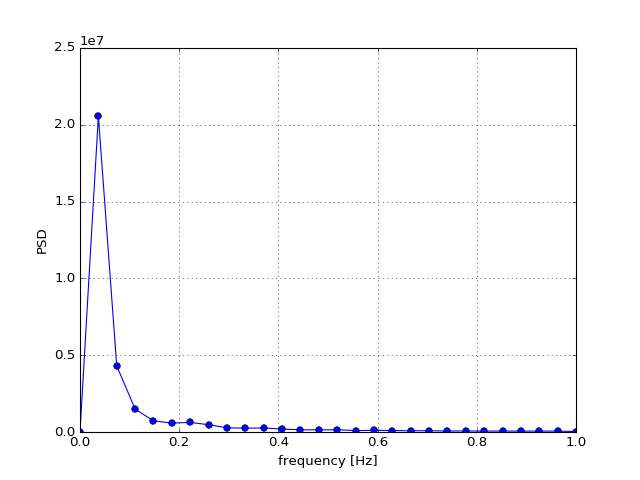

10.6.48.165 [107.193532, 190.508579, 190.53438399999999, 395.40069999999997, 467.96422899999999, 467.964562, 1076.6164759999999, 1110.3067900000001, 1110.3090629999999, 1180.6392960000001, 1295.8181119999999, 1431.9667449999999, 2195.82654, 2267.9515379999998, 2380.6428489999998, 2395.9686919999999, 2644.1047130000002, 2644.1290049999998, 2786.3689669999999, 2786.3718629999998, 3095.8496789999999, 3359.9604810000001, 3391.9630619999998, 3580.6448270000001]


<IPython.core.display.Javascript object>


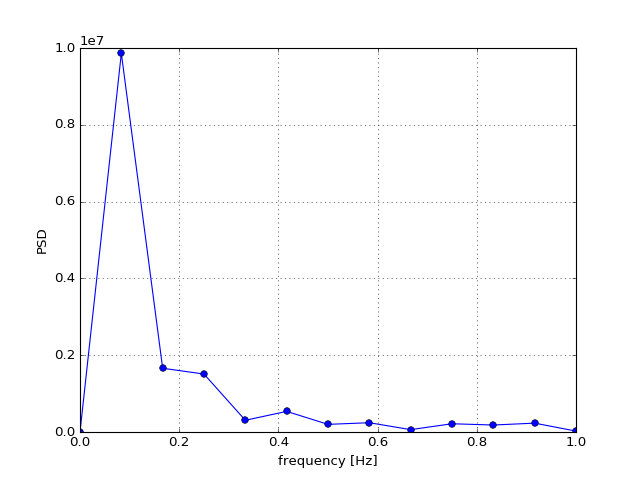

10.6.48.167 [125.27337799999999, 642.48349199999996, 674.48666500000002, 693.59515499999998, 1325.3038750000001, 2154.3390159999999, 2449.5761579999999, 2449.578755, 2449.5787650000002, 2465.1911110000001, 2465.1935290000001, 2478.4121709999999, 2479.2044700000001, 2481.5822370000001, 2509.1808129999999, 3393.6832789999999, 3413.6035080000001, 3455.0709320000001]


<IPython.core.display.Javascript object>


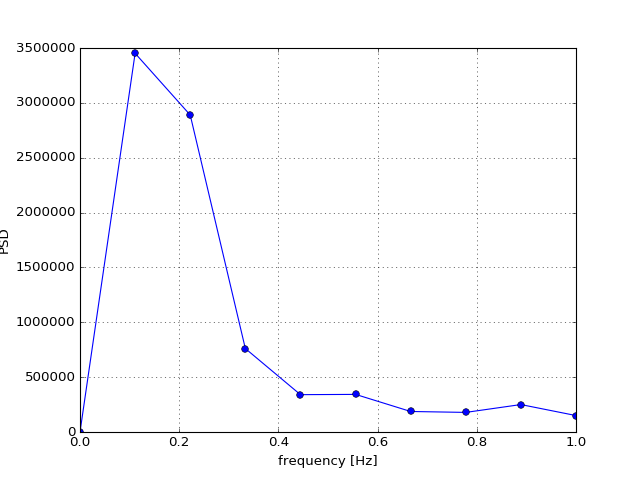

In [82]:
gp_src = df.groupby('srcip')['time']

cnt = 0
for k, v in gp_src:
    cnt += 1
    if cnt>50:
        break
    print k, list(v)
    
    f, Pxx = periodogram(v, fs=2)
    fig, ax = plt.subplots()
    ax.plot(f, Pxx, marker='o')
    ax.set_xlabel('frequency [Hz]')
    ax.set_ylabel('PSD')
    ax.grid(1)
    fig.show()

In [84]:
df_temp = df[ df['srcip']=='10.6.48.10' ]
df_temp

time       srcip            dstip  \
45983     127.272126  10.6.48.10   128.112.129.32   
51750     142.976088  10.6.48.10   128.112.129.32   
57541     157.578818  10.6.48.10   128.112.129.32   
57548     157.590999  10.6.48.10   128.112.129.32   
87173     241.523801  10.6.48.10   128.112.129.32   
110045    301.019924  10.6.48.10   128.112.129.32   
110052    301.048935  10.6.48.10   128.112.129.32   
125729    347.729918  10.6.48.10   128.112.129.32   
134687    368.655442  10.6.48.10   128.112.129.32   
151353    418.464031  10.6.48.10   128.112.129.32   
157000    433.720511  10.6.48.10   128.112.129.32   
174318    488.110250  10.6.48.10   128.112.129.32   
174319    488.111556  10.6.48.10   128.112.129.32   
212892    592.637762  10.6.48.10   128.112.129.32   
216947    601.457847  10.6.48.10   128.112.129.32   
216964    601.488238  10.6.48.10   128.112.129.32   
216988    601.514036  10.6.48.10   128.112.129.32   
225378    623.063313  10.6.48.10   128.112.129.32   
225384    623.069447  10.6.48.10   128.112.129.32   
225385    623.069883  10.6.48.10   128.112.129.32   
234891    648.421582  10.6.48.10   128.112.129.32   
238655    660.263888  10.6.48.10   128.112.129.32   
240014    663.392988  10.6.48.10   128.112.129.32   
240192    663.859134  10.6.48.10  128.112.133.220   
241887    668.363581  10.6.48.10    128.112.128.1   
245479    678.546431  10.6.48.10   128.112.129.32   
245505    678.650568  10.6.48.10   128.112.129.32   
261730    728.630393  10.6.48.10   128.112.129.32   
261747    728.683506  10.6.48.10   128.112.129.32   
264132    735.733053  10.6.48.10   128.112.129.32   
...              ...         ...              ...   
804863   2501.590790  10.6.48.10   128.112.129.32   
804871   2501.618225  10.6.48.10   128.112.129.32   
812365   2524.798176  10.6.48.10   128.112.129.32   
848743   2657.216381  10.6.48.10   128.112.129.32   
889371   2810.724957  10.6.48.10   128.112.129.32   
894614   2829.822942  10.6.48.10   128.112.129.32   
894622   2829.852494  10.6.48.10   128.112.129.32   
905998   2877.181101  10.6.48.10   128.112.129.32   
932584   2975.085119  10.6.48.10   128.112.129.32   
932590   2975.111923  10.6.48.10   128.112.129.32   
952650   3052.368616  10.6.48.10   128.112.129.32   
972416   3125.184281  10.6.48.10   128.112.129.32   
974067   3130.295890  10.6.48.10   128.112.129.32   
974075   3130.325411  10.6.48.10   128.112.129.32   
1007228  3256.680889  10.6.48.10   128.112.129.32   
1015294  3292.350457  10.6.48.10   128.112.129.32   
1016083  3295.733259  10.6.48.10   128.112.129.32   
1016093  3295.762872  10.6.48.10   128.112.129.32   
1016983  3299.297815  10.6.48.10   128.112.129.32   
1016985  3299.299236  10.6.48.10   128.112.129.32   
1027661  3337.420089  10.6.48.10   128.112.129.32   
1027663  3337.422771  10.6.48.10   128.112.129.32   
1027665  3337.438434  10.6.48.10   128.112.129.32   
1027689  3337.537120  10.6.48.10   128.112.129.32   
1027696  3337.593267  10.6.48.10   128.112.129.32   
1027712  3337.687100  10.6.48.10   128.112.129.32   
1043244  3397.242788  10.6.48.10   128.112.129.32   
1052402  3431.420859  10.6.48.10   128.112.129.32   
1070250  3495.010642  10.6.48.10   128.112.129.32   
1097465  3593.312264  10.6.48.10   128.112.129.32   

                                                  dnsquery  
45983    princetonu-mail-onmicrosoft-com.mail.eo.outloo...  
51750                            e1863.dspb.akamaiedge.net  
57541                                   wpad.princeton.edu  
57548                                    crl.usertrust.com  
87173                                   smtp.princeton.edu  
110045   princetonu-mail-onmicrosoft-com.mail.eo.outloo...  
110052   princetonu-mail-onmicrosoft-com.mail.eo.outloo...  
125729                        api-dc8397fa.duosecurity.com  
134687                                   crl.microsoft.com  
151353                                  smtp.princeton.edu  
157000   princetonu-mail-onmicrosoft-com.mail.eo.outloo...

### Summary
- Time series are too sparse to be interpreted meaningfuly by periodogram
- we get hig point around freq ~ 0.1 when using sampling rate of 2 Hz
- but fitbit timeseries should have freq of 1/900 ~ 0.001
- huge time gaps and sparsity make frequency analysis cumbersome => can't separate bg data series
- any other way?

In [47]:
def reduce_domain(domain, level):
    tmp = domain.split('.')
    out = '.'.join( tmp[-level:] )
    return out
    
reduce_domain('www.youtube.com', 1)

'com'